### Introduction
Bitcoin, as a decentralized digital currency, is well-known for its highly volatile price movements influenced by a variety of factors such as market sentiment, macroeconomic events, and regulatory changes. Predicting the price trend of Bitcoin has become a critical task for investors, traders, and financial analysts seeking to mitigate risks and maximize returns. Traditional statistical models often fall short in capturing the intricate patterns and dependencies in such data, especially when it comes to the long-term and nonlinear relationships inherent in time series data like Bitcoin prices.

### For the 5511 Deep Learning Final Project

I have chosen to explore LSTM (Long Short-Term Memory) and Transformer models and compare their performance. My project focuses on applying these two cutting-edge deep learning techniques to predict Bitcoin price trends, a task that requires handling complex time series data.

The LSTM model, known for its ability to capture temporal dependencies, is a natural fit for sequential data like cryptocurrency price movements. On the other hand, the Transformer model, with its powerful self-attention mechanism, offers scalability and the ability to capture long-term dependencies effectively. By comparing these two architectures, I aim to analyze their strengths and weaknesses in time series forecasting and evaluate their applicability to volatile and dynamic financial datasets like Bitcoin.

This project not only highlights my understanding of advanced deep learning architectures but also demonstrates their practical application to real-world problems. Through this study, I hope to uncover insights into how each model performs and provide a framework for future work in financial trend prediction.

In [184]:
import sys
import pandas as pd
sys.path.append('/Users/data_science/Applications/anaconda3/lib/python3.11/site-packages')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Step 1-3 
### 1. Gather data, determine the method of data collection and provenance of the data (1 point)
### 2. Identify a Deep Learning Problem
### 3. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

Summary of Bitcoin Price Trend Prediction Project

This project aims to predict Bitcoin price trends using advanced deep learning models such as LSTM and Transformer. The dataset is carefully constructed and enriched with technical and sentiment-based features to enhance predictive power. Below is a comprehensive summary of the data collection, feature engineering, preprocessing, and exploratory steps taken to lay the foundation for modeling.

1. Data Collection

The data for this project was sourced from Binance, a widely recognized and reliable cryptocurrency trading platform, via its official API. The raw dataset includes fundamental market data such as:
	•	High, Low, Open, Close Prices
	•	Volume

These fields form the basis for constructing both technical and sentiment-based indicators, crucial for time-series analysis and Bitcoin trend prediction.

2. Feature Engineering

To improve the dataset’s relevance for predictive modeling, I enriched it with a variety of features:

Technical Indicators:

Using the Technical Analysis (TA) library, I derived additional indicators that are essential for understanding market behavior. These include:
	•	Moving Averages (SMA_10, SMA_24, EMA_10, EMA_24)
	•	Bollinger Bands (High, Low, Width)
	•	Relative Strength Index (RSI)
	•	Stochastic Oscillator
	•	MACD (Moving Average Convergence Divergence)
	•	Volume-Based Indicators (OBV, Volume_MA)

Sentiment-Based Features:

I incorporated unique features such as:
	•	longShortRatio: Represents the ratio of long to short positions, capturing market sentiment and investor behavior.
	•	premium index: Reflects the premium or discount in futures prices compared to spot prices, providing insights into market expectations and psychological trends.

These additional features enhance the dataset by offering deeper insights into both market trends and investor sentiment.

3. Data Preprocessing

The dataset was processed through an automated routine that ensures:
	•	Data cleanliness: All null values are removed.
	•	Standardization: Data adheres to a consistent and reliable format.
	•	Reproducibility: Preprocessing steps are automated for efficiency and repeatability.

While the detailed code is not included, this routine guarantees that the updated_raw dataset is robust, reliable, and ready for modeling.

4. Exploratory Data Analysis (EDA)

To better understand the dataset’s structure and quality, I used Sweetviz, a powerful data reporting tool. Sweetviz provided:
	•	Comprehensive visualizations of distributions and correlations.
	•	Insights into missing values and overall data quality.

This overview enabled me to identify key patterns and ensure that the dataset (df4) was well-prepared for subsequent modeling steps.

5. Target and Problem Definition

The target variable for this project is Percent_Diff, which represents the percentage change in Bitcoin’s price over a defined time interval. This metric is essential for:
	•	Normalizing price changes across different scales.
	•	Capturing relative trends, which are more actionable for trading decisions.

The problem is formulated as a time-series regression task, aiming to predict future percentage price changes based on historical data and engineered features.

Conclusion

This project represents a comprehensive approach to Bitcoin trend prediction. By leveraging a combination of technical indicators, sentiment-based features, and robust preprocessing methods, the dataset has been transformed into a powerful foundation for predictive modeling. The use of advanced tools like the TA library and Sweetviz ensured that the data preparation process was both efficient and insightful.

With this enriched dataset, LSTM and Transformer models can effectively capture temporal dependencies and complex feature interactions, enabling accurate and actionable predictions in the highly volatile cryptocurrency market. This methodology lays the groundwork for a detailed performance comparison between the two deep learning architectures.

In [187]:
#@title Import Data
df = pd.read_csv("/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/updated_raw.csv", parse_dates=['UTC'], index_col='UTC')
df2 = pd.read_csv("/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/premium_index.csv",   parse_dates=['UTC'], index_col='UTC')
df2.drop(['HKT'], axis=1, inplace=True)

In [189]:
#@title Data Transformation
# 1
df3 = pd.concat([df, df2], axis=1)
df3.drop(['longAccount', 'shortAccount'], axis=1, inplace=True)

#2
df3['HKT'] = df3.index + pd.Timedelta(hours=8)
# Format HKT datetime without timezone offse
df3['HKT'] = df3['HKT'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Insert the HKT column as the third column
df3.insert(0, 'HKT', df3.pop('HKT'))

#3
df3 = df3.sort_index(ascending=True)
df4= df3.dropna()

In [191]:
import ta  # Technical Analysis library

# 1. Price-Based Indicators
df4.loc[:, 'SMA_10'] = df4['Close'].rolling(window=10).mean()  # Simple Moving Average (10)
df4.loc[:, 'SMA_24'] = df4['Close'].rolling(window=24).mean()  # Simple Moving Average (24)
df4.loc[:, 'EMA_10'] = ta.trend.ema_indicator(close=df4['Close'], window=10)  # Exponential Moving Average (10)
df4.loc[:, 'EMA_24'] = ta.trend.ema_indicator(close=df4['Close'], window=24)  # Exponential Moving Average (24)

# Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=df4['Close'], window=20)
df4.loc[:, 'Bollinger_High'] = bollinger.bollinger_hband()  # Upper Band
df4.loc[:, 'Bollinger_Low'] = bollinger.bollinger_lband()  # Lower Band
df4.loc[:, 'Bollinger_Width'] = df4['Bollinger_High'] - df4['Bollinger_Low']  # Band Width

# Average True Range (ATR)
df4.loc[:, 'ATR'] = ta.volatility.AverageTrueRange(
    high=df4['High'], low=df4['Low'], close=df4['Close'], window=14
).average_true_range()

# 2. Momentum Indicators
df4.loc[:, 'RSI'] = ta.momentum.RSIIndicator(close=df4['Close'], window=14).rsi()  # Relative Strength Index

# Stochastic Oscillator
stoch = ta.momentum.StochasticOscillator(
    high=df4['High'], low=df4['Low'], close=df4['Close'], window=14, smooth_window=3
)
df4.loc[:, 'Stochastic'] = stoch.stoch()

# MACD Line
df4.loc[:, 'MACD'] = ta.trend.MACD(close=df4['Close']).macd()

# 3. Volume-Based Indicators
df4.loc[:, 'OBV'] = ta.volume.OnBalanceVolumeIndicator(
    close=df4['Close'], volume=df4['Volume']
).on_balance_volume()
df4.loc[:, 'Volume_MA'] = df4['Volume'].rolling(window=10).mean()  # Moving Average of Volume

# 4. Target and Volatility Indicators
df4.loc[:, 'Close_48h_ahead'] = df4['Close'].shift(-48)  # Shift to predict 48 hours ahead

# Calculate Percent Difference (Fixed Formula)
df4.loc[:, 'Percent_Diff'] = ((df4['Close_48h_ahead'] / df4['Close']) - 1) * 100  # Percent difference in percentage form

/var/folders/p9/bm2cpcm141jgpkjqy3q3s1r40000gp/T/ipykernel_9469/2012798853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'SMA_10'] = df4['Close'].rolling(window=10).mean()  # Simple Moving Average (10)
/var/folders/p9/bm2cpcm141jgpkjqy3q3s1r40000gp/T/ipykernel_9469/2012798853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'SMA_24'] = df4['Close'].rolling(window=24).mean()  # Simple Moving Average (24)
/var/folders/p9/bm2cpcm141jgpkjqy3q3s1r40000gp/T/ipykernel_9469/2012798853

In [193]:
df4 = df4.dropna()
df4.to_csv('/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/new_df', index=False)

In [195]:
#!pip install sweetviz
import sweetviz as sv
import pandas as pd

# Create and display the Sweetviz report
report = sv.analyze(df4)
#report.show_html("Sweetviz_Report.html")  # Save report as an HTML file

                                             |      | [  0%]   00:00 -> (? left)

### Step 4 
### Perform Analysis Using Deep Learning Models of your Choice, Present Discussion, and Conclusions 

Summary of LSTM and Transformer Results

This project aimed to predict Bitcoin price trends using LSTM and Transformer models, focusing on forecasting the percentage difference (Percent_Diff) in price. Both models were trained on an enriched dataset containing technical indicators and sentiment-based features. Their performance was evaluated using metrics, architecture details, and visualizations to understand their strengths and limitations.

1. LSTM Results

Performance

	•	Mean Absolute Error (MAE): 0.91%
	•	Mean Error (ME): -0.11%
	•	The negative ME indicates that the model slightly underestimates price changes on average.
	•	The LSTM performed consistently in capturing temporal dependencies, which is crucial for Bitcoin trend prediction.

Training and Validation Loss

	•	The training and validation loss curves show rapid convergence in the initial epochs, stabilizing at low values (Graph 1). This indicates effective learning with no significant overfitting.

Discrepancy Summary

The discrepancy distribution for LSTM (Graph 2) highlights:
	•	Predictions within 0–0.1% discrepancy: ~80 cases, indicating high accuracy for many predictions.
	•	A significant number of predictions (~140) have discrepancies exceeding 1.2%, suggesting challenges in handling extreme market movements.

Strengths and Limitations

	•	Strengths:
	•	Captures short-term trends well due to its ability to learn sequential patterns.
	•	Stable performance with minimal overfitting during training.
	•	Limitations:
	•	Struggles with long-term dependencies and extreme fluctuations in Bitcoin prices.
	•	Longer training time due to sequential processing.

2. Transformer Results

Performance

	•	Mean Absolute Error (MAE): 0.86%
	•	Mean Error (ME): Slightly positive, indicating a tendency to overestimate price changes slightly.
	•	The Transformer slightly outperformed the LSTM in terms of overall accuracy, particularly for capturing long-term dependencies.

Architecture

The Transformer’s architecture includes:
	•	Input Layer: Processes sequences of shape (10, 21) (10 timesteps and 21 features).
	•	Multi-Head Attention: Captures relationships between all timesteps, regardless of their distance, enabling the model to identify long-term dependencies.
	•	Feedforward Layers: Dense layers with 128 and 21 units, introducing non-linearity and reducing dimensionality.
	•	Final Layers:
	•	Flatten: Converts 3D outputs into a 2D array for regression tasks.
	•	Dense (64): Adds a fully connected layer before the output.
	•	Dense (1): Produces the final prediction.

Training and Validation Loss

	•	The Transformer loss curves (Graph 4) show rapid convergence similar to the LSTM, with stable training and validation losses. However, slight fluctuations in validation loss suggest sensitivity to noise in the dataset.

Discrepancy Summary

The Transformer’s discrepancy summary (Graph 3) reveals:
	•	Consistently better accuracy for discrepancies within 0–0.6%, outperforming LSTM in small ranges.
	•	However, a higher number of predictions (~200) fall into the >1.2% discrepancy range, indicating challenges with large price swings.

Strengths and Limitations

	•	Strengths:
	•	Handles long-term dependencies effectively due to the self-attention mechanism.
	•	Faster training due to parallelized processing of sequences.
	•	Limitations:
	•	Slightly more prone to overfitting on small datasets, requiring careful regularization.
	•	Higher computational cost compared to LSTM.

3. Comparison of LSTM and Transformer

Metric	LSTM	Transformer
MAE	0.91%	0.86%
ME	-0.11%	Slightly Positive
Training Loss	Stable	Stable
Validation Loss	Minimal Overfit	Slight Fluctuations
Short-Term Trends	Excellent	Good
Long-Term Trends	Limited	Better
Training Speed	Slower	Faster
Handling Extreme Fluctuations	Better for stability	Struggles with >1.2% discrepancies

4. Key Observations

	1.	Performance:
	•	The Transformer outperformed LSTM in capturing long-term dependencies and achieving better MAE.
	•	LSTM demonstrated better stability, particularly for short-term trends, and fewer extreme discrepancies.
	2.	Training Behavior:
	•	Both models showed effective training with stable convergence, though the Transformer required more computational resources.
	3.	Feature Contributions:
	•	Sentiment-based features like longShortRatio and premium index significantly improved performance for both models, highlighting the importance of incorporating investor sentiment in price trend predictions.

5. Conclusion

	•	LSTM:
	•	Best suited for scenarios where short-term accuracy and stability are critical, with limited computational resources.
	•	Transformer:
	•	Ideal for datasets with long-term dependencies and when computational resources are sufficient.
	•	More accurate in predicting subtle price changes but struggles with extreme fluctuations.

Future Work

	•	Incorporate additional data sources, such as news sentiment or macroeconomic indicators, to further enhance prediction accuracy.
	•	Experiment with hybrid models (e.g., combining LSTM and Transformer layers) to leverage the strengths of both architectures.
	•	Address large discrepancies by integrating ensemble methods or refining hyperparameters.

This analysis underscores the potential of deep learning models in financial forecasting, providing actionable insights for traders and analysts.

In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [8]:
df4 = df4.sort_index(ascending=True)
df4

,HKT,Open,High,Low,Close,Volume,longShortRatio,premium_open,premium_high,premium_low,...,Bollinger_Low,Bollinger_Width,ATR,RSI,Stochastic,MACD,OBV,Volume_MA,Close_48h_ahead,Percent_Diff
UTC,,,,,,,,,,,,,,,,,,,,,
2024-08-02 14:00:00,2024-08-02 22:00:00,65229.99,65366.01,63102.00,63157.95,4724.50891,1.7571,-0.000246,0.001987,-0.001171,...,63513.346382,2096.973236,766.211512,36.890034,2.310065,-19.822857,1779.057960,1634.801422,59586.700000,-5.654474
2024-08-02 15:00:00,2024-08-02 23:00:00,63157.95,63636.46,62432.90,63416.01,4670.33215,1.8744,-0.000244,0.000675,-0.002582,...,63511.739400,2099.587200,797.450690,39.998427,31.804433,-100.265485,6449.390110,2001.656798,59086.010000,-6.827929
2024-08-02 16:00:00,2024-08-03 00:00:00,63416.00,63611.24,62964.41,63307.38,1657.67588,2.2196,-0.000611,0.000257,-0.000947,...,63310.908930,2355.986141,786.692069,39.124843,28.290161,-170.813350,4791.714230,2028.764529,58663.900000,-7.334816
2024-08-02 17:00:00,2024-08-03 01:00:00,63307.39,63456.01,63066.00,63098.01,743.54298,2.1319,-0.000383,0.000318,-0.000823,...,63091.495589,2615.710821,758.357636,37.428128,21.516866,-240.841184,4048.171250,2008.660843,57864.430000,-8.294366
2024-08-02 18:00:00,2024-08-03 02:00:00,63098.01,63220.00,62784.00,62898.25,1026.49958,2.1348,-0.000380,0.000300,-0.000884,...,62875.920376,2818.249247,735.332090,35.831513,15.054463,-308.896937,3021.671670,2010.789965,58770.600000,-6.562424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-28 21:00:00,2024-11-29 05:00:00,94820.00,95164.00,94809.52,95099.99,1023.53283,1.0877,0.000764,0.001665,0.000486,...,94720.844767,1130.640466,599.716944,49.273753,29.080162,0.491907,90098.715208,1106.147822,96792.020000,1.779212
2024-11-28 22:00:00,2024-11-29 06:00:00,95100.00,95651.82,95008.22,95651.79,907.44782,1.0951,0.000919,0.001508,0.000264,...,94725.120993,1117.288013,602.851448,56.048795,63.964471,39.602625,91006.163028,1104.035499,96466.110000,0.851338
2024-11-28 23:00:00,2024-11-29 07:00:00,95651.78,96023.48,95530.24,95643.98,802.88994,1.0978,0.000730,0.000912,0.000142,...,94717.333607,1150.117785,595.022059,55.934923,63.470730,69.170593,90203.273088,1068.279090,96407.990000,0.798806


In [9]:
features = [ 'High', 'Low',
    'Close', 'SMA_10', 'SMA_24', 'EMA_10', 'EMA_24', 'Bollinger_High',
    'Bollinger_Low', 'ATR', 'RSI', 'Stochastic', 'MACD', 'OBV', 'Volume_MA',
    'Bollinger_Width', 'Volume','longShortRatio','premium_open'	,'premium_high','premium_low'
]
target = 'Percent_Diff'

X = df4[features]
y = df4[target]
original_index = X.index

In [10]:
# Scale features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Create sequences for LSTM
timesteps = 10

In [11]:
# Function to create sequences for LSTM
def create_sequences(X, y, timesteps):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps):
        X_seq.append(X[i:i + timesteps])
        y_seq.append(y[i + timesteps])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
X_seq, y_seq = create_sequences(X_scaled, y_scaled, timesteps)

In [12]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Retrieve the corresponding test indices
X_test_indices = original_index[len(X_train):len(X_train) + len(X_test)]

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(timesteps, X_train.shape[2])),
    Dense(1)  # Output layer for regression
])

/Users/data_science/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [15]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=10,               # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore best weights
)

In [16]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=150,               # Maximum number of epochs
    batch_size=32,            # Batch size
    validation_split=0.2,     # Use 20% of training data for validation
    callbacks=[early_stopping],  # Add EarlyStopping
    verbose=1
)

Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0760 - val_loss: 0.0120
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - val_loss: 0.0111
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 9/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0086
Epoch 10/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 11/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 12/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [17]:
# Evaluate on the test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 9.8369e-04
Test Loss: 0.001128924428485334


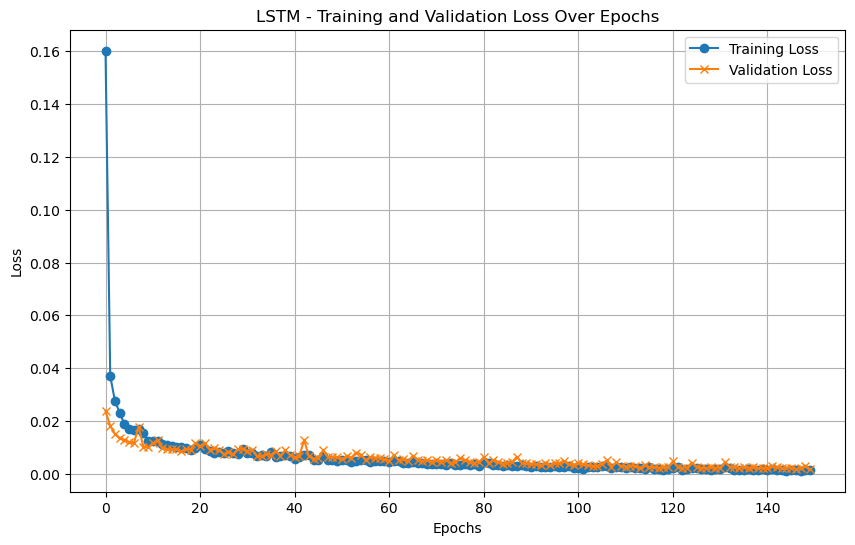

In [96]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss', marker='o')
plt.plot(validation_loss, label='Validation Loss', marker='x')
plt.title('LSTM - Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Predict the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_original = target_scaler.inverse_transform(y_test)

# Print the first few predictions for verification
print("Scaled Predictions (y_pred_scaled):", y_pred_scaled[:5].flatten())
print("Original Scale Predictions (y_pred):", y_pred[:5].flatten())
print("Original Scale Actuals (y_test_original):", y_test_original[:5].flatten())

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Scaled Predictions (y_pred_scaled): [0.59416944 0.57822096 0.5285477  0.7169667  0.50019985]
Original Scale Predictions (y_pred): [ 1.3623254  0.7976634 -0.961038   5.710011  -1.9647049]
Original Scale Actuals (y_test_original): [ 2.92903287  1.29646309 -0.56580436  5.52707935 -2.75223377]


In [20]:
import numpy as np

# Print as normal numbers
np.set_printoptions(suppress=True)  # Suppress scientific notation
#print(y_pred)  # Display the first 5 predictionsy

In [21]:
print(X_test.shape)

(567, 10, 21)


In [22]:

# Step 1: Inverse transform predictions and test labels
y_test_original = target_scaler.inverse_transform(y_test)  # Original scale of y_test
y_pred_original = y_pred  # Original scale of y_pred

In [23]:
# Step 2: Extract last timestep from X_test
# Assuming you want the features from the last timestep
X_test_last_timestep = X_test[:, -1, :]  # Shape: (samples, features)

In [24]:
# Convert to DataFrame
X_test_df = pd.DataFrame(X_test_last_timestep, columns=features, index=X_test_indices)  # Use your feature names and original index

# Step 3: Combine predictions, actual results, and test features into one DataFrame
comparison_df = X_test_df.copy()  # Start with test features
comparison_df['Actual_Price_Diff'] = y_test_original.flatten()  # Add actual results
comparison_df['Predicted_Price_Diff'] = y_pred_original.flatten()  # Add predictions

# Step 4: Display the comparison
print(comparison_df.head())

                         High       Low     Close    SMA_10    SMA_24  \
UTC                                                                     
2024-11-05 01:00:00  0.384382  0.415832  0.407467  0.371112  0.339719   
2024-11-05 02:00:00  0.937705  0.942480  0.939257  0.928477  0.895504   
2024-11-05 03:00:00  0.256171  0.286022  0.281091  0.230587  0.191178   
2024-11-05 04:00:00  0.184989  0.224335  0.210983  0.175989  0.144751   
2024-11-05 05:00:00  0.204819  0.240846  0.228043  0.191584  0.164101   

                       EMA_10    EMA_24  Bollinger_High  Bollinger_Low  \
UTC                                                                      
2024-11-05 01:00:00  0.369586  0.331306        0.344676       0.385304   
2024-11-05 02:00:00  0.929999  0.910606        0.939800       0.864625   
2024-11-05 03:00:00  0.228060  0.178021        0.200736       0.251207   
2024-11-05 04:00:00  0.170771  0.127273        0.147510       0.210416   
2024-11-05 05:00:00  0.185994  0.148092     

In [25]:
final = comparison_df[['Actual_Price_Diff', 'Predicted_Price_Diff']]
final

,Actual_Price_Diff,Predicted_Price_Diff
UTC,,
2024-11-05 01:00:00,2.929033,1.362325
2024-11-05 02:00:00,1.296463,0.797663
2024-11-05 03:00:00,-0.565804,-0.961038
2024-11-05 04:00:00,5.527079,5.710011
2024-11-05 05:00:00,-2.752234,-1.964705
...,...,...
2024-11-28 11:00:00,-1.747339,-1.021098
2024-11-28 12:00:00,-1.638205,-2.263099
2024-11-28 13:00:00,-0.547561,0.957105


In [26]:
import numpy as np

# Calculate absolute errors
errors = np.abs(comparison_df['Actual_Price_Diff'] - comparison_df['Predicted_Price_Diff'])

# Calculate mean absolute error (MAE)
mae = errors.mean()
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optional: Calculate mean error (ME)
mean_error = (comparison_df['Actual_Price_Diff'] - comparison_df['Predicted_Price_Diff']).mean()
print(f"Mean Error (ME): {mean_error:.2f}")

Mean Absolute Error (MAE): 0.91
Mean Error (ME): -0.11


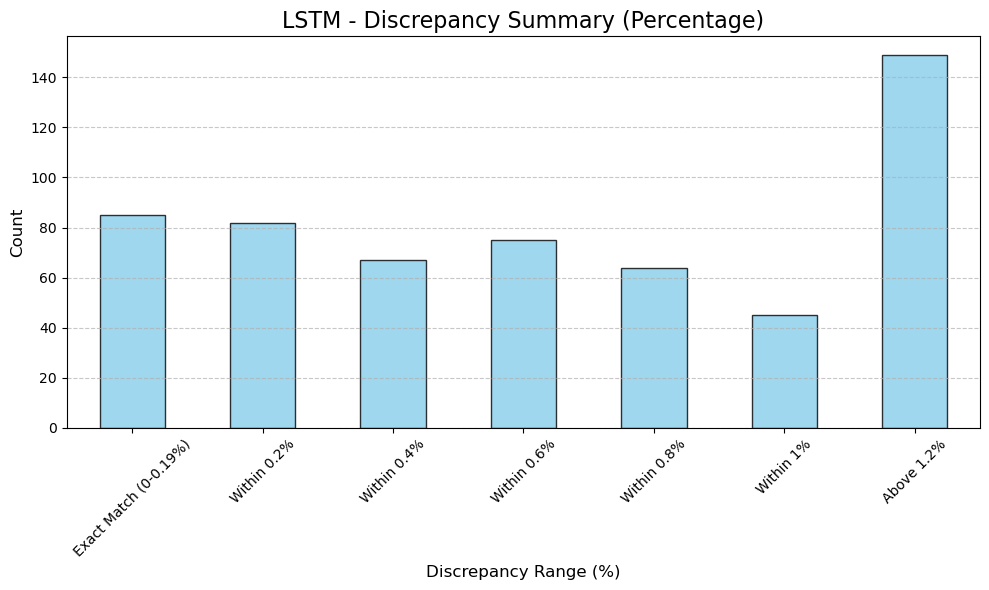

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert actual and predicted values to percentage deviations
actual_percent = comparison_df['Actual_Price_Diff'] 
predicted_percent = comparison_df['Predicted_Price_Diff'] 

# Calculate percentage discrepancies
discrepancy = np.abs(actual_percent - predicted_percent)

# Define ranges and labels for grouping
ranges = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, np.inf]
labels = ['Exact Match (0-0.19%)', 'Within 0.2%', 'Within 0.4%', 'Within 0.6%', 'Within 0.8%', 'Within 1%', 'Above 1.2%']

# Categorize discrepancies into defined ranges
comparison_df['Discrepancy_Range'] = pd.cut(discrepancy, bins=ranges, labels=labels, include_lowest=True)

# Summarize the data
summary = comparison_df['Discrepancy_Range'].value_counts().sort_index()

# Plot the summary
plt.figure(figsize=(10, 6))
summary.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add labels and title
plt.title('LSTM - Discrepancy Summary (Percentage)', fontsize=16)
plt.xlabel('Discrepancy Range (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


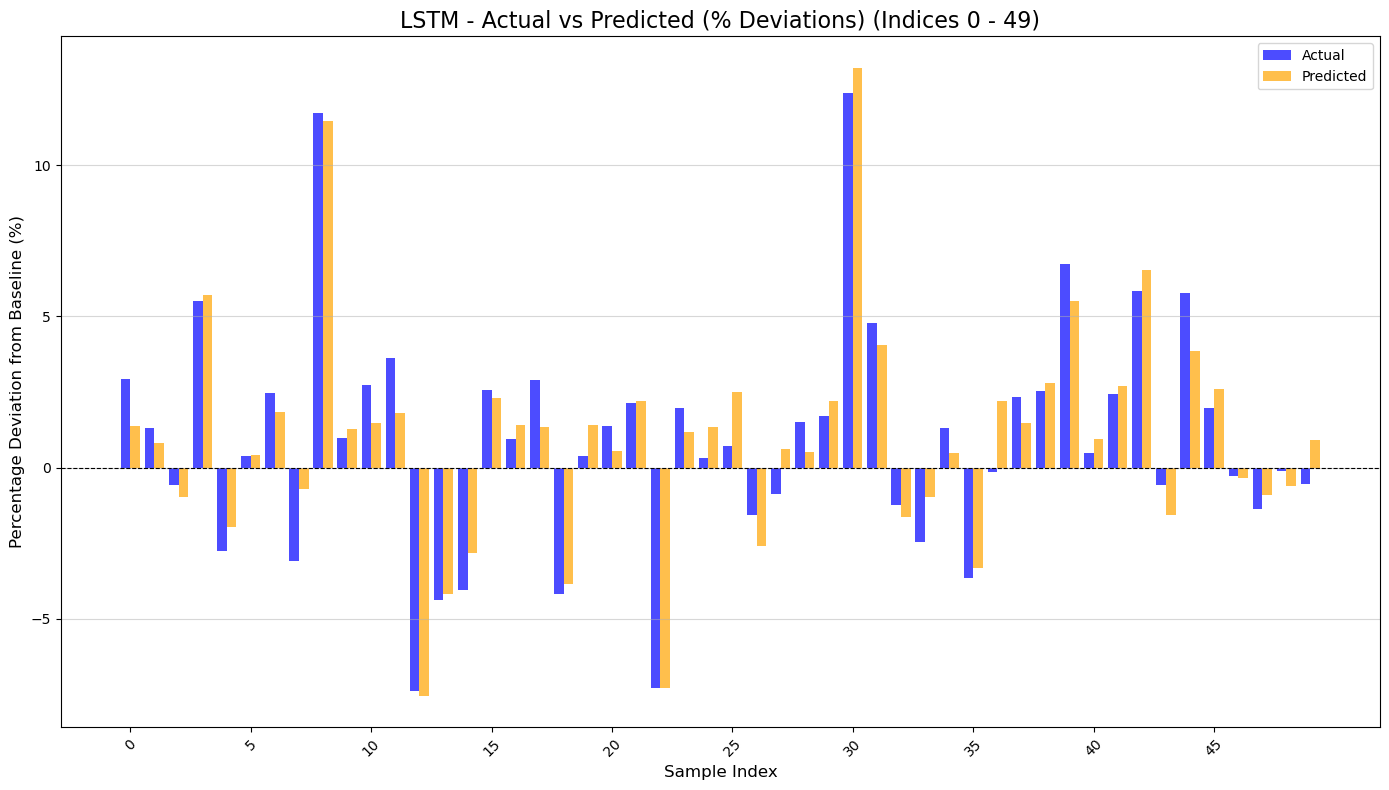

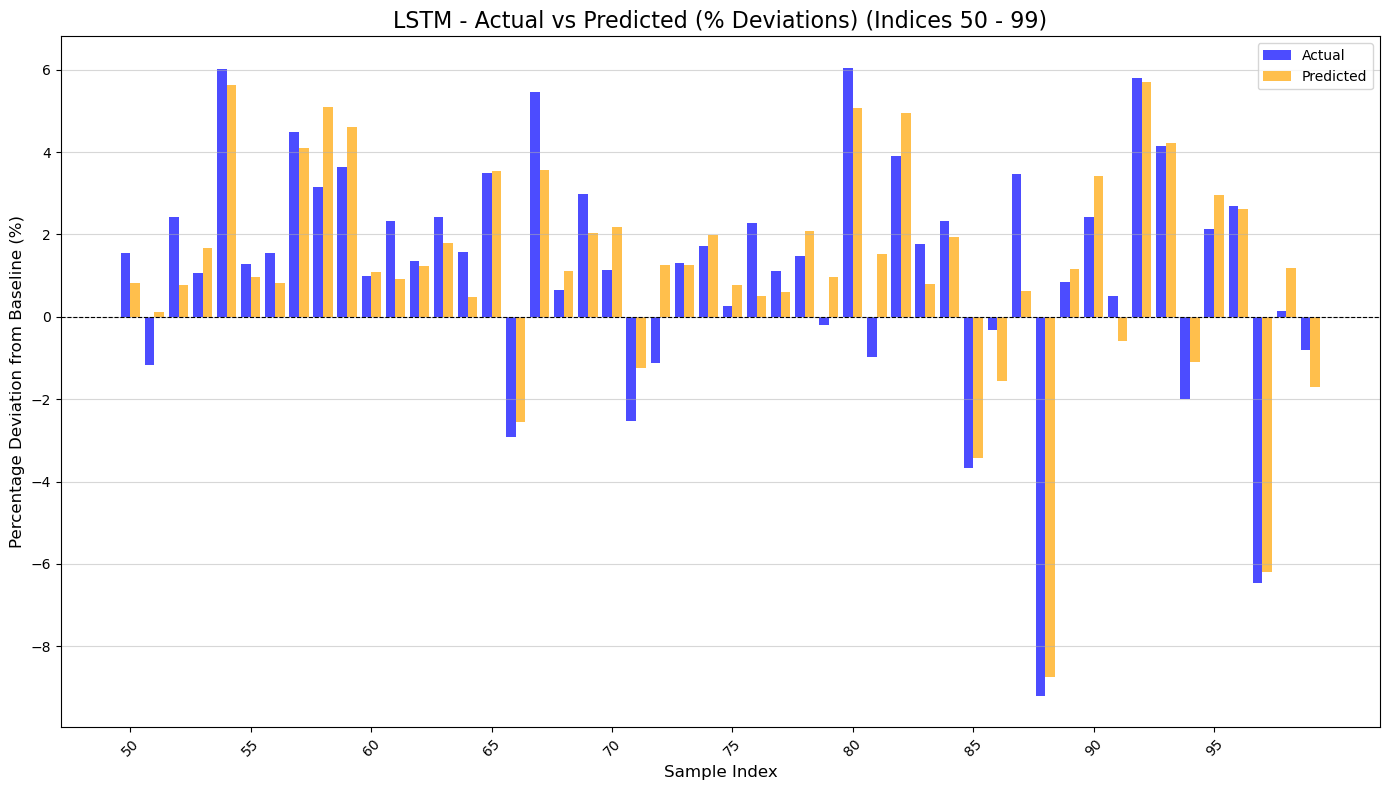

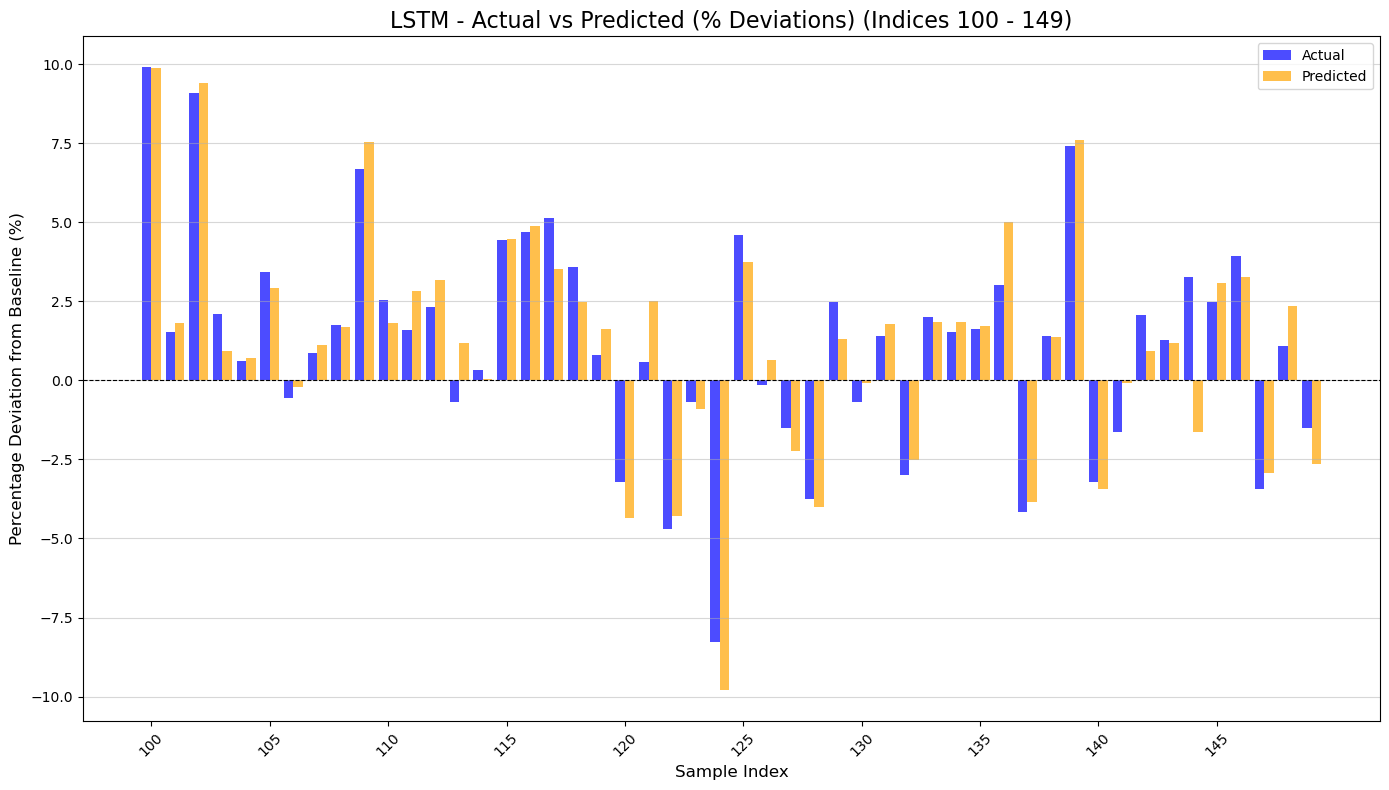

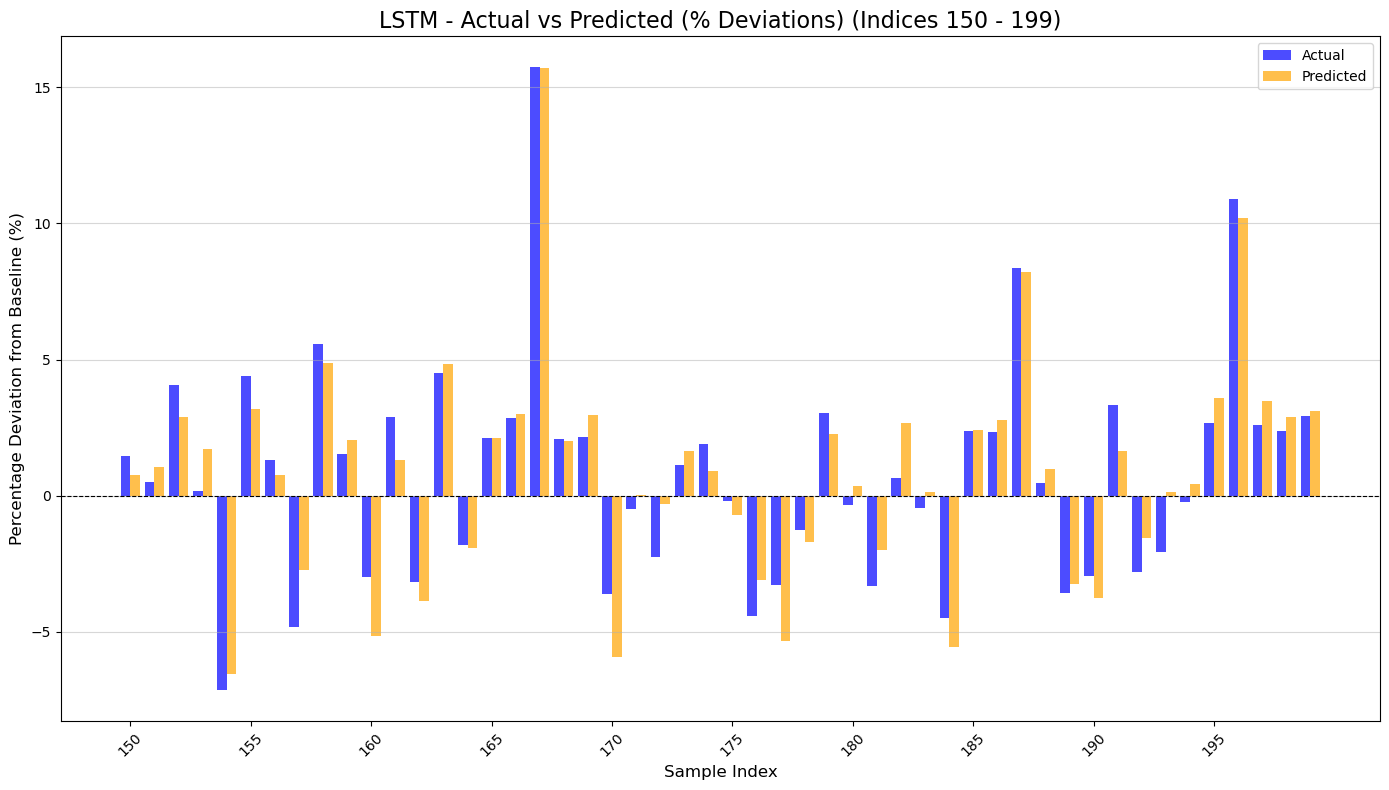

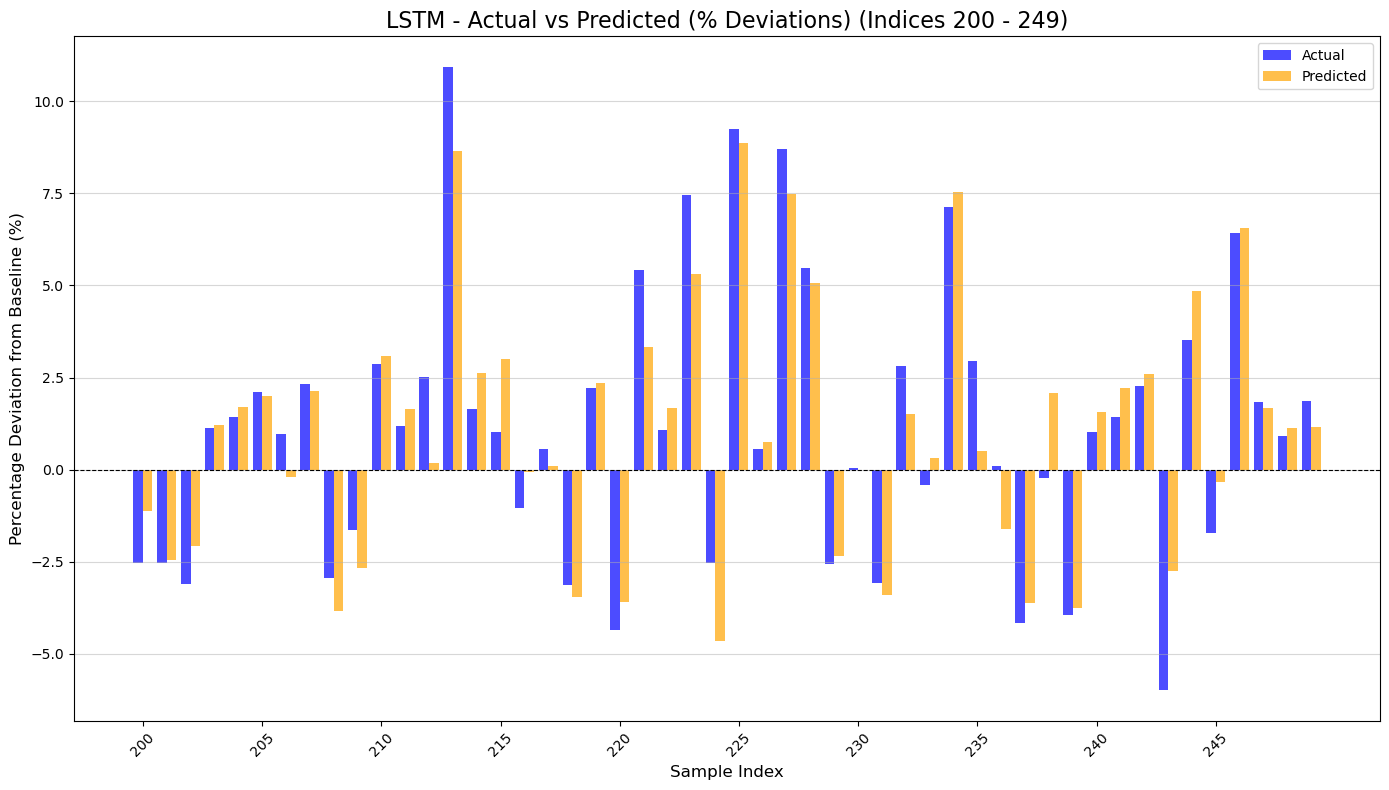

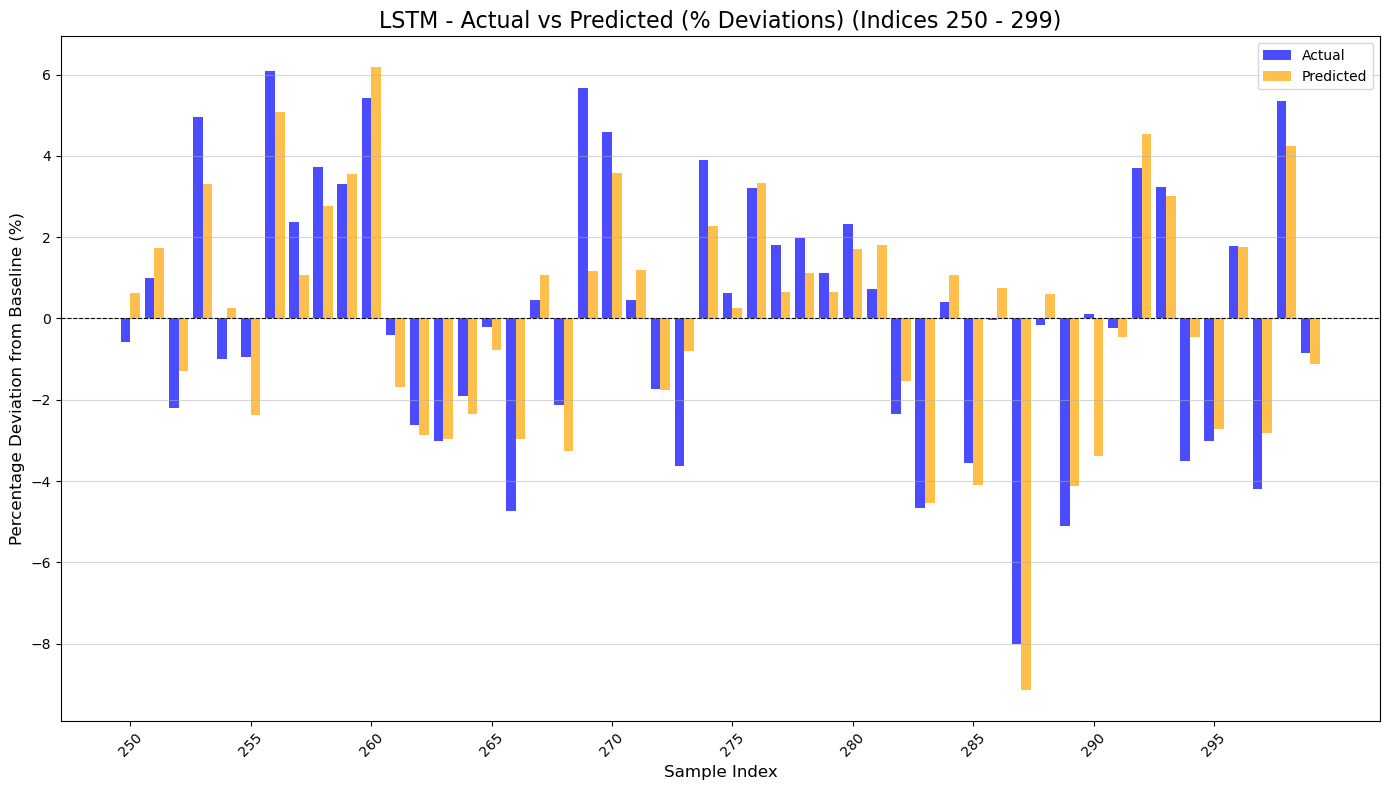

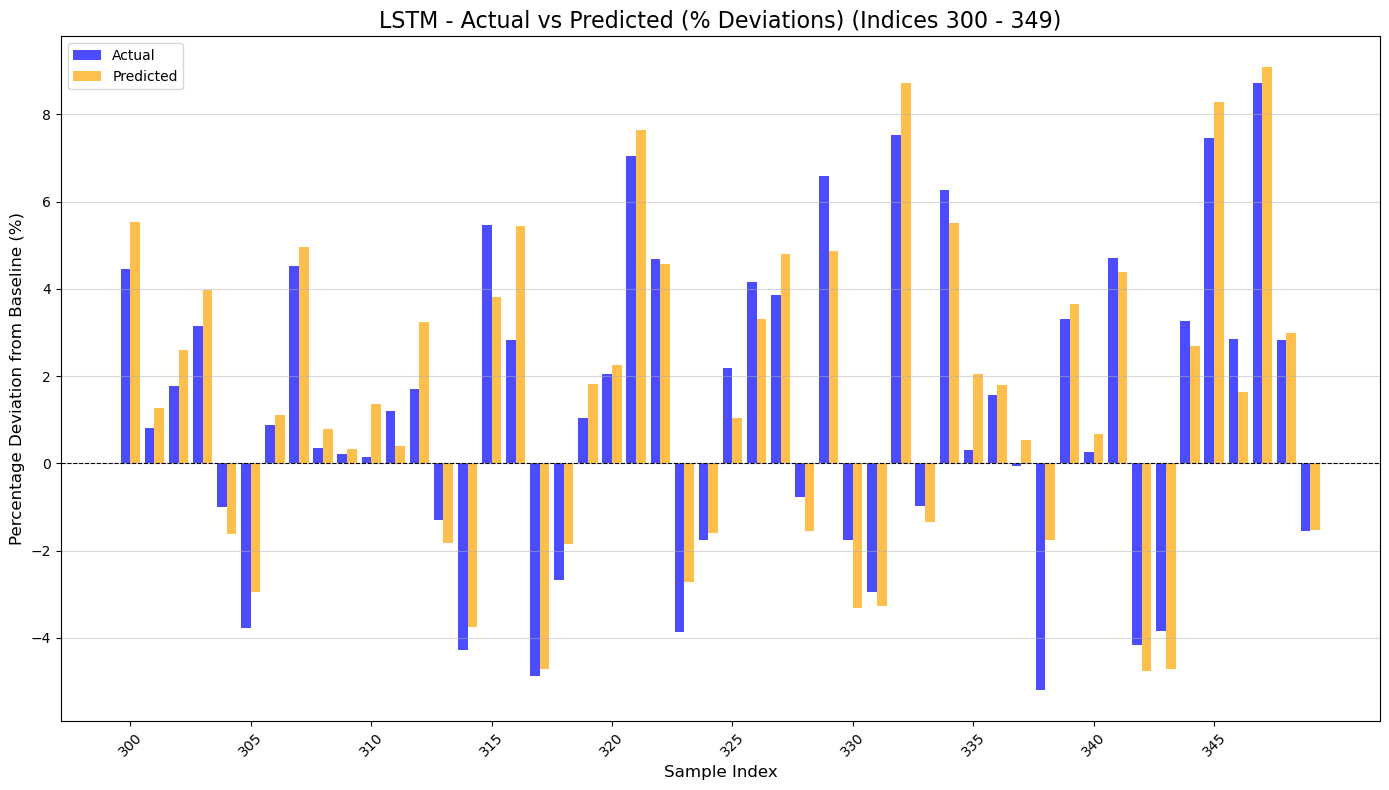

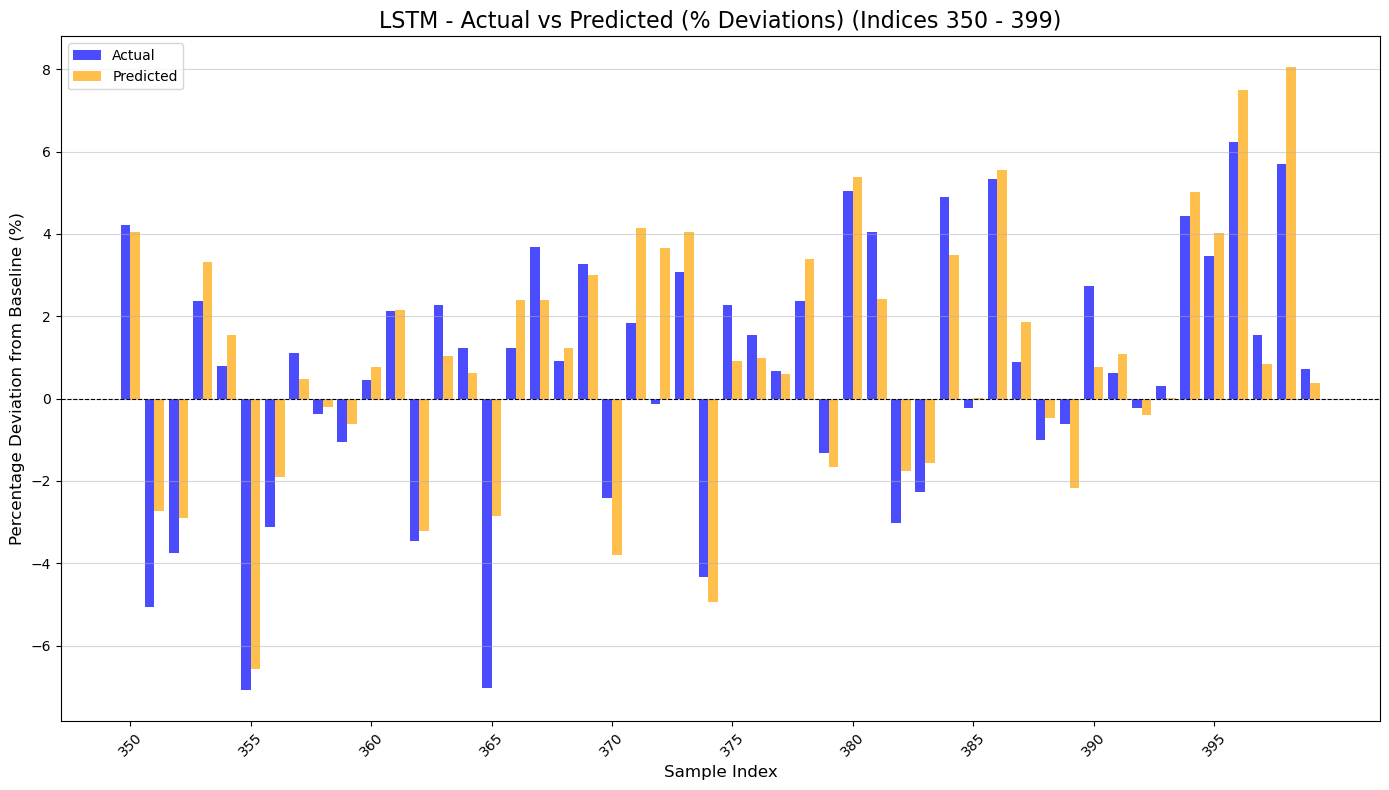

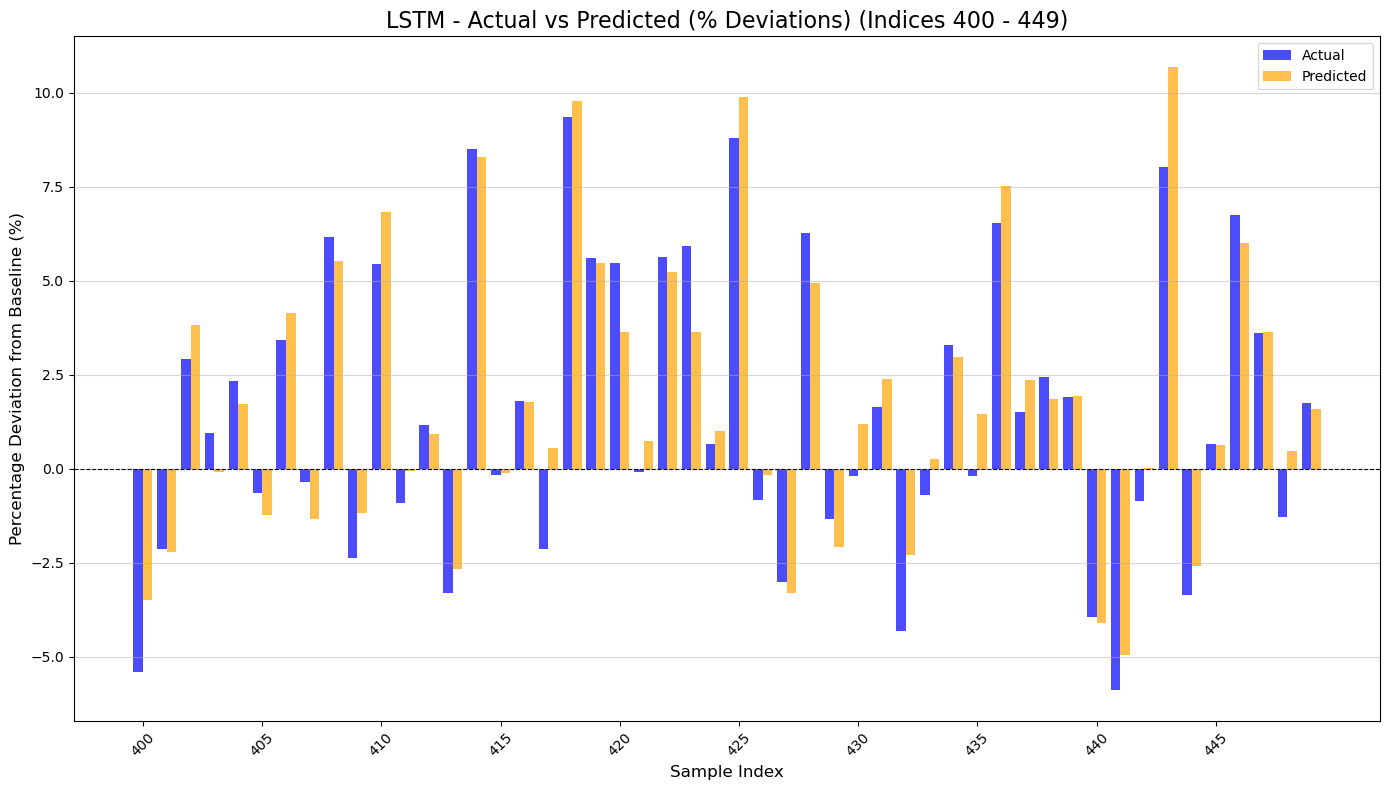

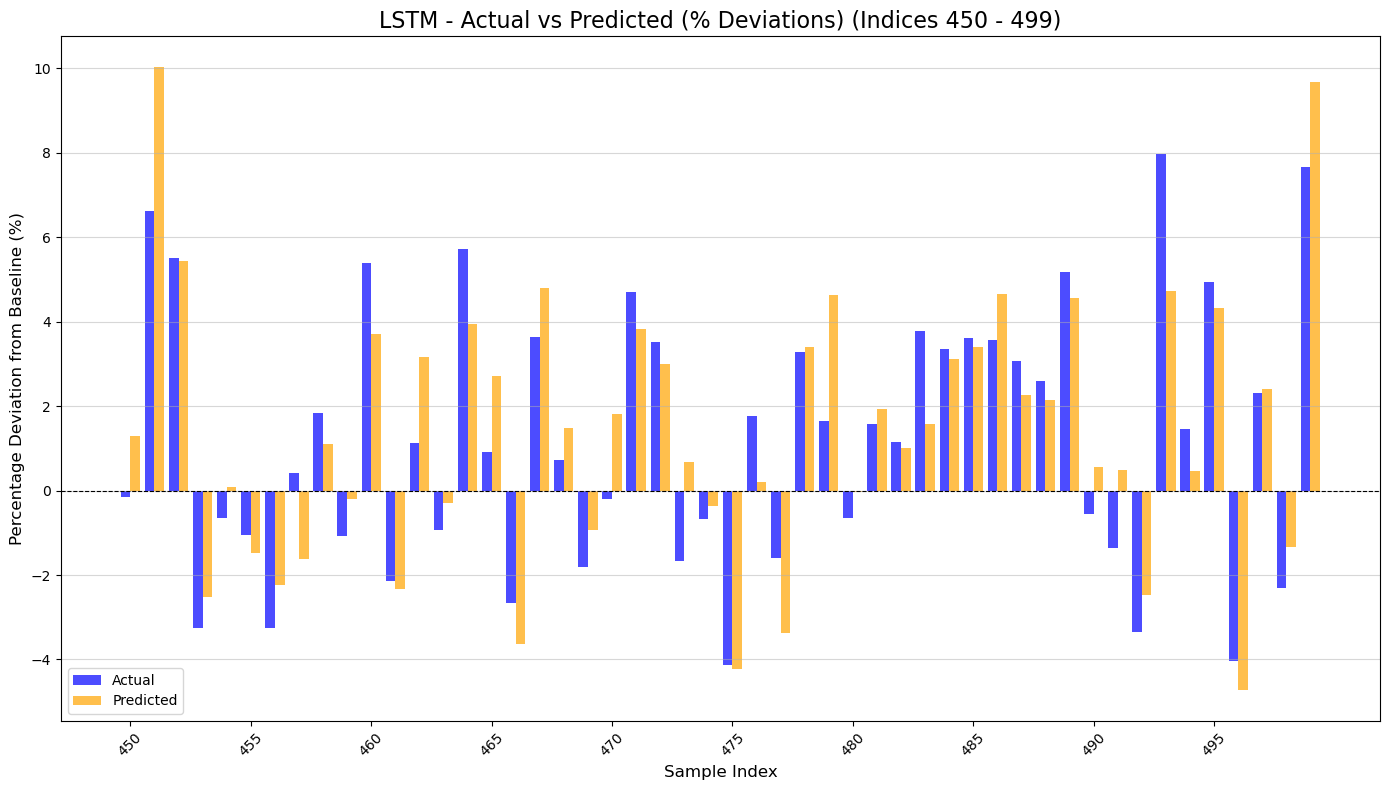

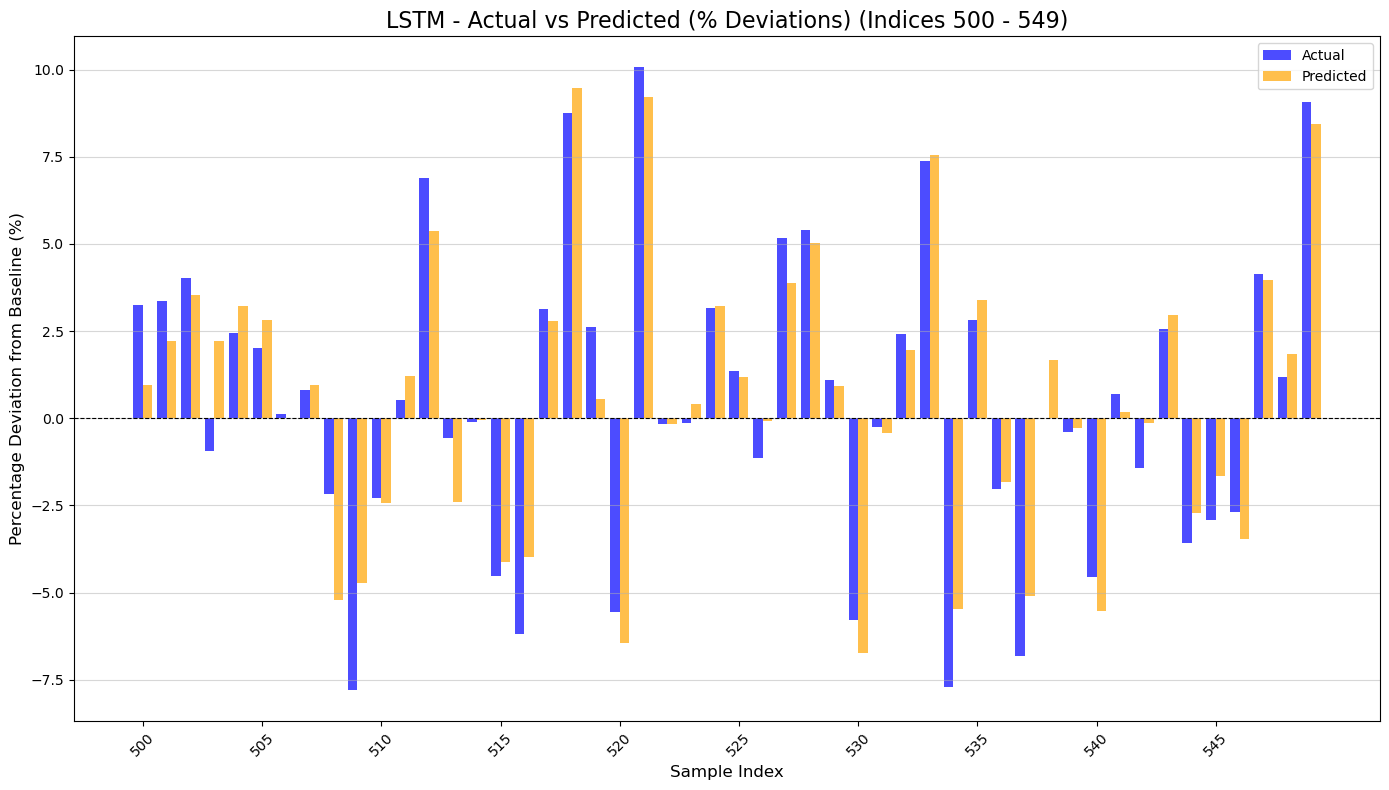

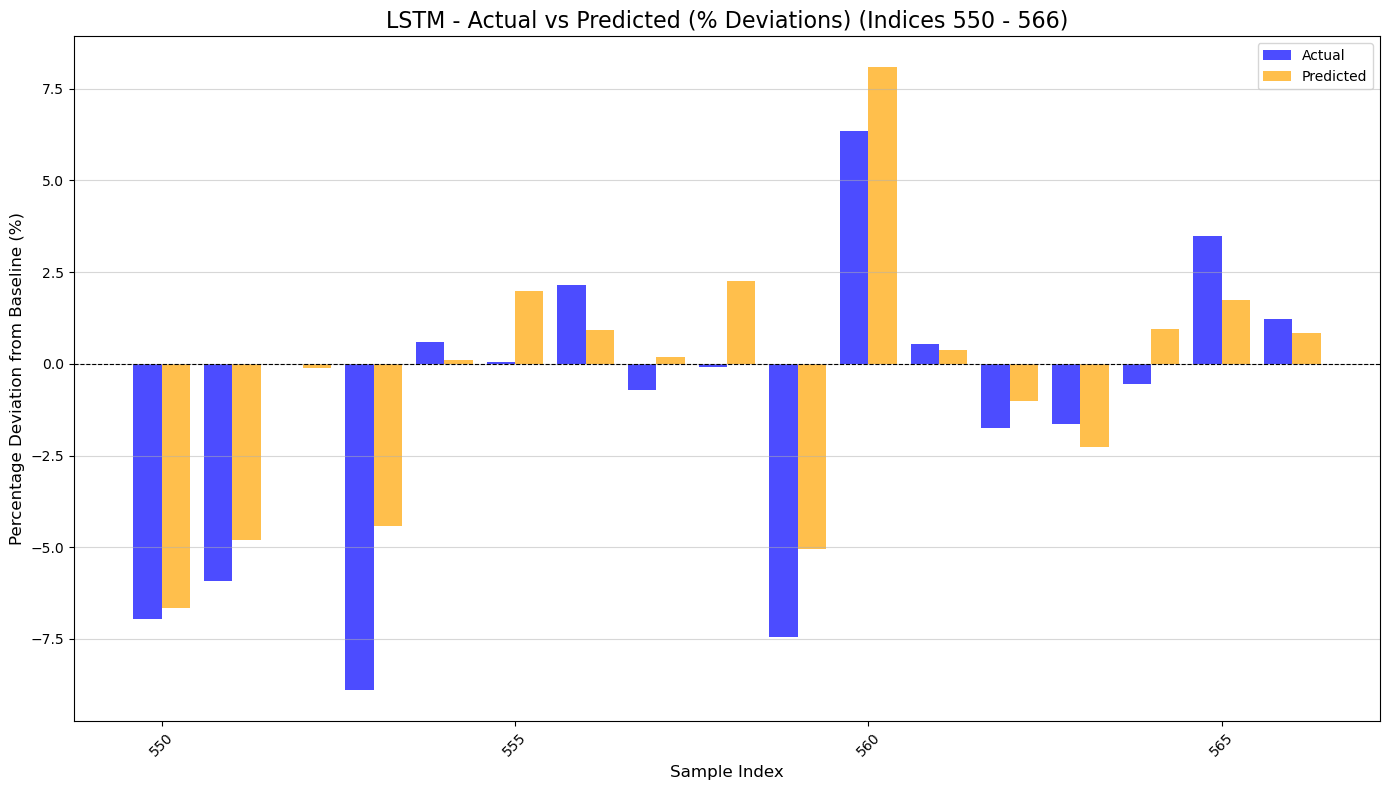

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
chunk_size = 50  # Maximum number of indices per chart
num_chunks = len(comparison_df) // chunk_size + (1 if len(comparison_df) % chunk_size != 0 else 0)

# Data preparation
actual = comparison_df['Actual_Price_Diff']  # Replace this with percentage-based actual values
predicted = comparison_df['Predicted_Price_Diff']  # Replace this with percentage-based predicted values
indices = np.arange(len(comparison_df))  # X-axis positions for each point

# Convert deviations to percentages
actual_percent = actual
predicted_percent = predicted 

# Create plots for each chunk
for i in range(num_chunks):
    # Calculate start and end indices for the chunk
    start_idx = i * chunk_size
    end_idx = min(start_idx + chunk_size, len(comparison_df))
    
    # Extract data for the current chunk
    actual_chunk = actual_percent[start_idx:end_idx]
    predicted_chunk = predicted_percent[start_idx:end_idx]
    indices_chunk = indices[start_idx:end_idx]
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    plt.bar(indices_chunk - 0.2, actual_chunk, width=0.4, label='Actual', color='blue', alpha=0.7)
    plt.bar(indices_chunk + 0.2, predicted_chunk, width=0.4, label='Predicted', color='orange', alpha=0.7)
    
    # Add a baseline at y=0
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    
    # Add labels, legend, and title
    plt.title(f'LSTM - Actual vs Predicted (% Deviations) (Indices {start_idx} - {end_idx-1})', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Percentage Deviation from Baseline (%)', fontsize=12)
    plt.xticks(indices_chunk[::5], rotation=45)  # Show every 5th index for clarity
    plt.legend()
    plt.grid(axis='y', alpha=0.5)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [29]:
# Save the model in HDF5 format
model.save('/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/lstm_model.keras')

In [30]:
import joblib
joblib.dump(target_scaler, '/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/target_scaler.pkl')

['/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/target_scaler.pkl']

In [31]:
joblib.dump(feature_scaler, '/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/feature_scaler.pkl')

['/Users/data_science/Desktop/5511_Deep_Learning/Final_Project/feature_scaler.pkl']

In [63]:
### Try Other Model - Transformer 

In [90]:
from keras.models import Model
from keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Transformer Block
def transformer_block(inputs, num_heads, ff_dim):
    # Multi-Head Attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = Dropout(0.1)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-Forward Network
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Dropout(0.1)(ff_output)
    return LayerNormalization(epsilon=1e-6)(attention_output + ff_output)

# Build Transformer Model
def build_transformer(input_shape, num_heads=4, ff_dim=128):
    inputs = Input(shape=input_shape)
    x = transformer_block(inputs, num_heads=num_heads, ff_dim=ff_dim)

    # Flatten before Dense for compatibility
    x = Flatten()(x)  
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)  # Single value per sample
    model = Model(inputs, outputs)
    return model

# Use your LSTM data
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)

# Create Transformer model
model_t = build_transformer(input_shape)
model_t.compile(optimizer='adam', loss='mse')
model_t.summary()

# Train the model
history = model_t.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict on test data
predictions_t = model_t.predict(X_test)

# Inverse transform predictions if necessary
# predictions_original = target_scaler.inverse_transform(predictions)
# y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# If not scaled, use the raw values
#predictions_original_t = predictions_t
#y_test_original = y_test

# Inverse transform predictions
predictions_original_t = target_scaler.inverse_transform(predictions_t)

# Inverse transform test target values
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 10, 21)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 21)    │      7,329 │ input_layer_9[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 10, 21)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 10, 21)    │          0 │ input_layer_9[0]… │
│                     │                   │            │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 21)    │         42 │ add_14[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 10, 128)   │      2,816 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 10, 21)    │      2,709 │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 10, 21)    │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 10, 21)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 21)    │         42 │ add_15[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 210)       │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 64)        │     13,504 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1)         │         65 │ dense_31[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,507 (103.54 KB)

 Trainable params: 26,507 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3688 - val_loss: 0.0238
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0421 - val_loss: 0.0182
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 - val_loss: 0.0151
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238 - val_loss: 0.0134
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0129
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0120
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - val_loss: 0.0116
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - val_loss: 0.0179
Epoch 9/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 - val_loss: 0.0103
Epoch 10/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - val_loss: 0.0100
Epoch 11/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - val_loss: 0.0117
Epoch 12/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

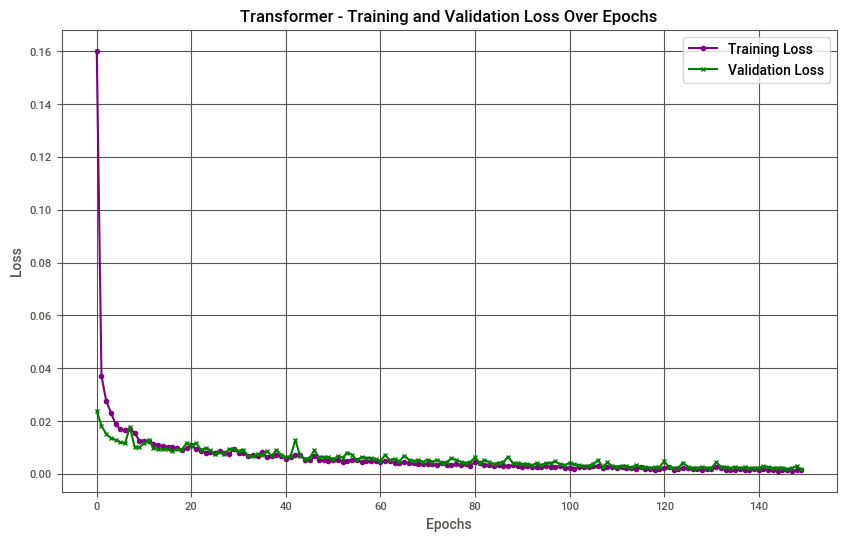

In [203]:
# Extract loss and validation loss from the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss', marker='o', color='Purple')  # Training Loss: Purple
plt.plot(validation_loss, label='Validation Loss', marker='x', color='Green')  # Validation Loss: Green
plt.title('Transformer - Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
trans_comparison_df = pd.DataFrame({
    'Actual': y_test_original.flatten(),  # Flatten if it's a 2D array
    'Predicted': predictions_original_t.flatten()  # Flatten if necessary
})

# Display the first few rows
print(trans_comparison_df.head())

     Actual  Predicted
0  2.929033  -0.271212
1  1.296463   1.756201
2 -0.565804  -0.081876
3  5.527079   4.962903
4 -2.752234  -2.633505


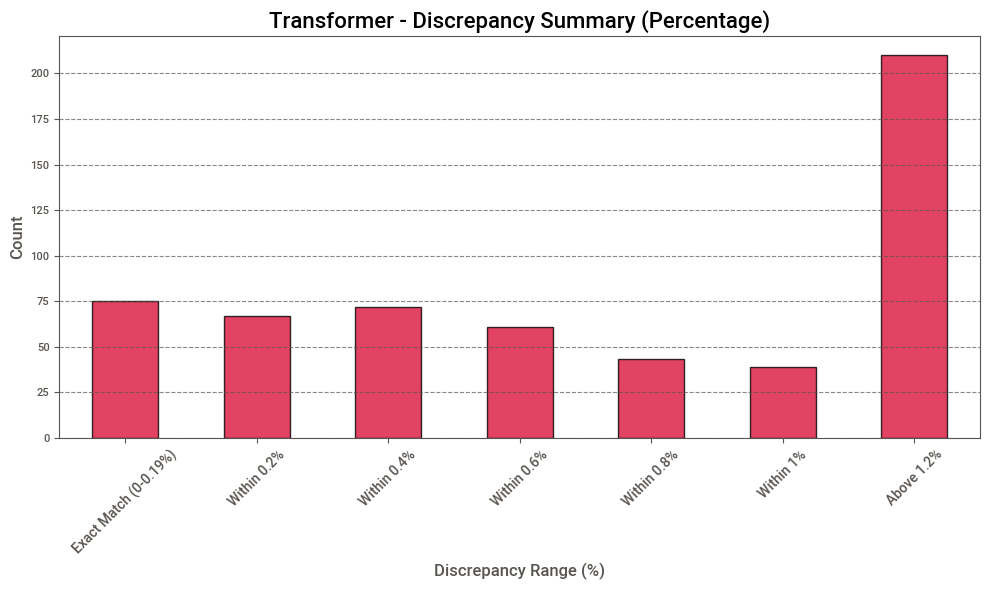

In [199]:
# Convert actual and predicted values to percentage deviations
trans_actual_percent = trans_comparison_df['Actual'] 
trans_predicted_percent = trans_comparison_df['Predicted'] 

# Calculate percentage discrepancies
discrepancy = np.abs(trans_actual_percent - trans_predicted_percent)

# Define ranges and labels for grouping
ranges = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, np.inf]
labels = ['Exact Match (0-0.19%)', 'Within 0.2%', 'Within 0.4%', 'Within 0.6%', 'Within 0.8%', 'Within 1%', 'Above 1.2%']

# Categorize discrepancies into defined ranges
trans_comparison_df['Discrepancy_Range'] = pd.cut(discrepancy, bins=ranges, labels=labels, include_lowest=True)

# Summarize the data
trans_summary = trans_comparison_df['Discrepancy_Range'].value_counts().sort_index()

# Plot the summary
plt.figure(figsize=(10, 6))
trans_summary.plot(kind='bar', color='crimson', edgecolor='black', alpha=0.8)

# Add labels and title
plt.title('Transformer - Discrepancy Summary (Percentage)', fontsize=16)
plt.xlabel('Discrepancy Range (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


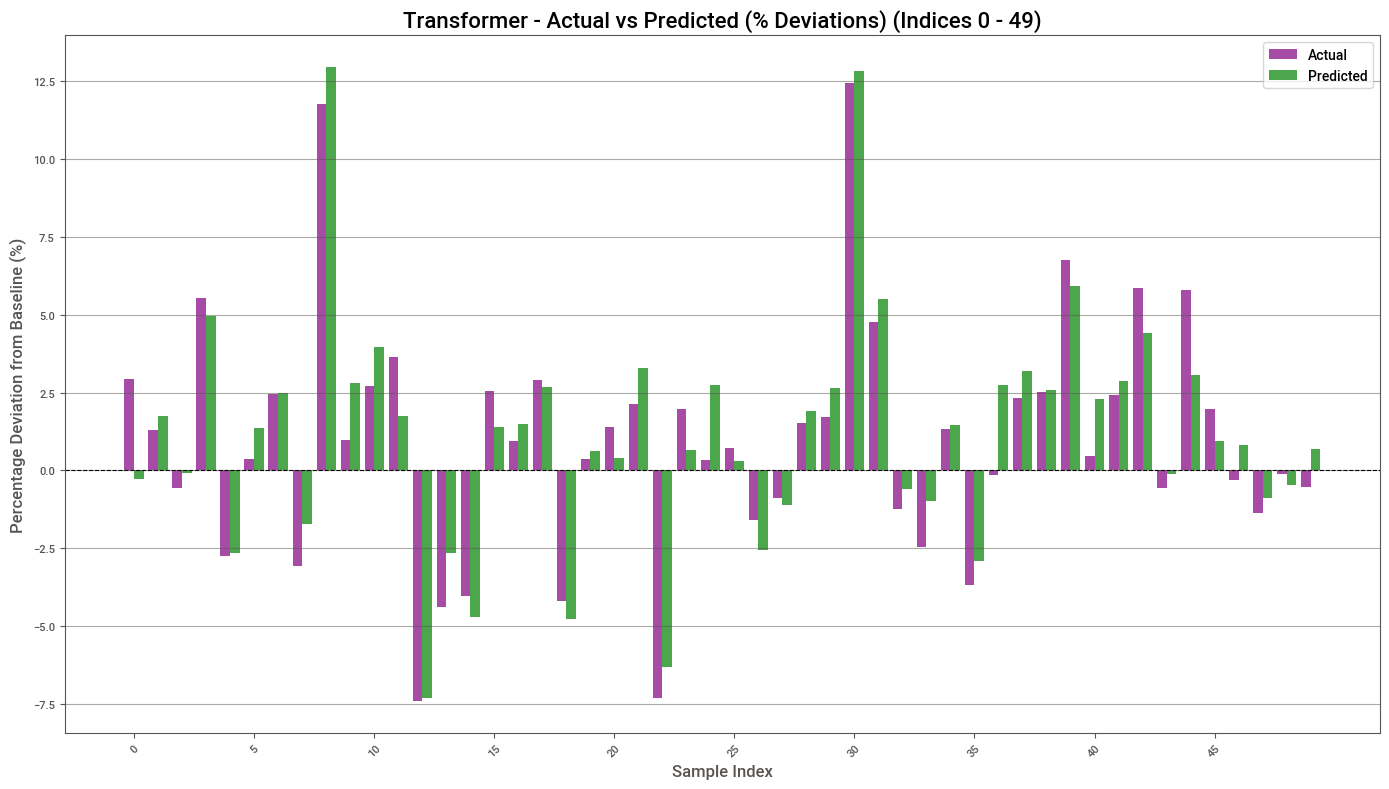

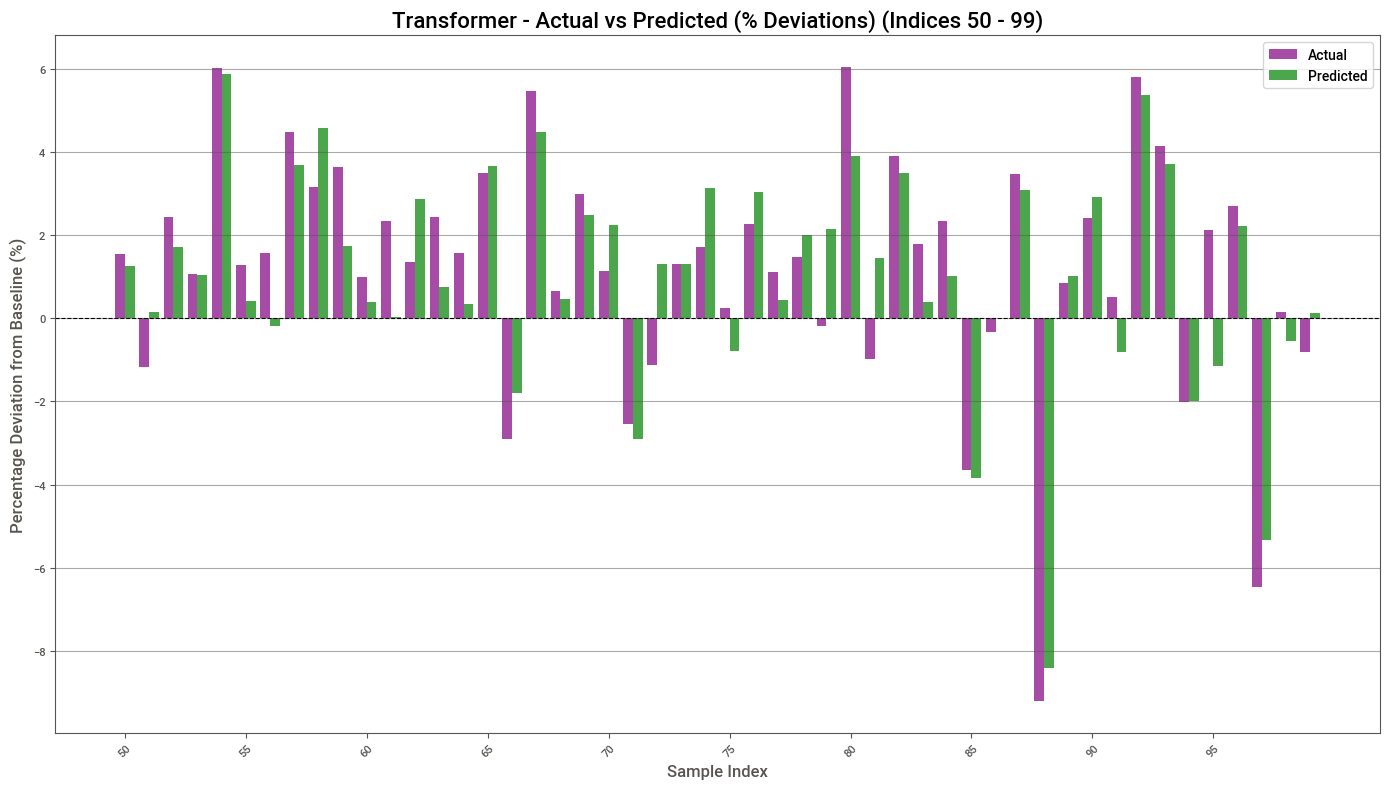

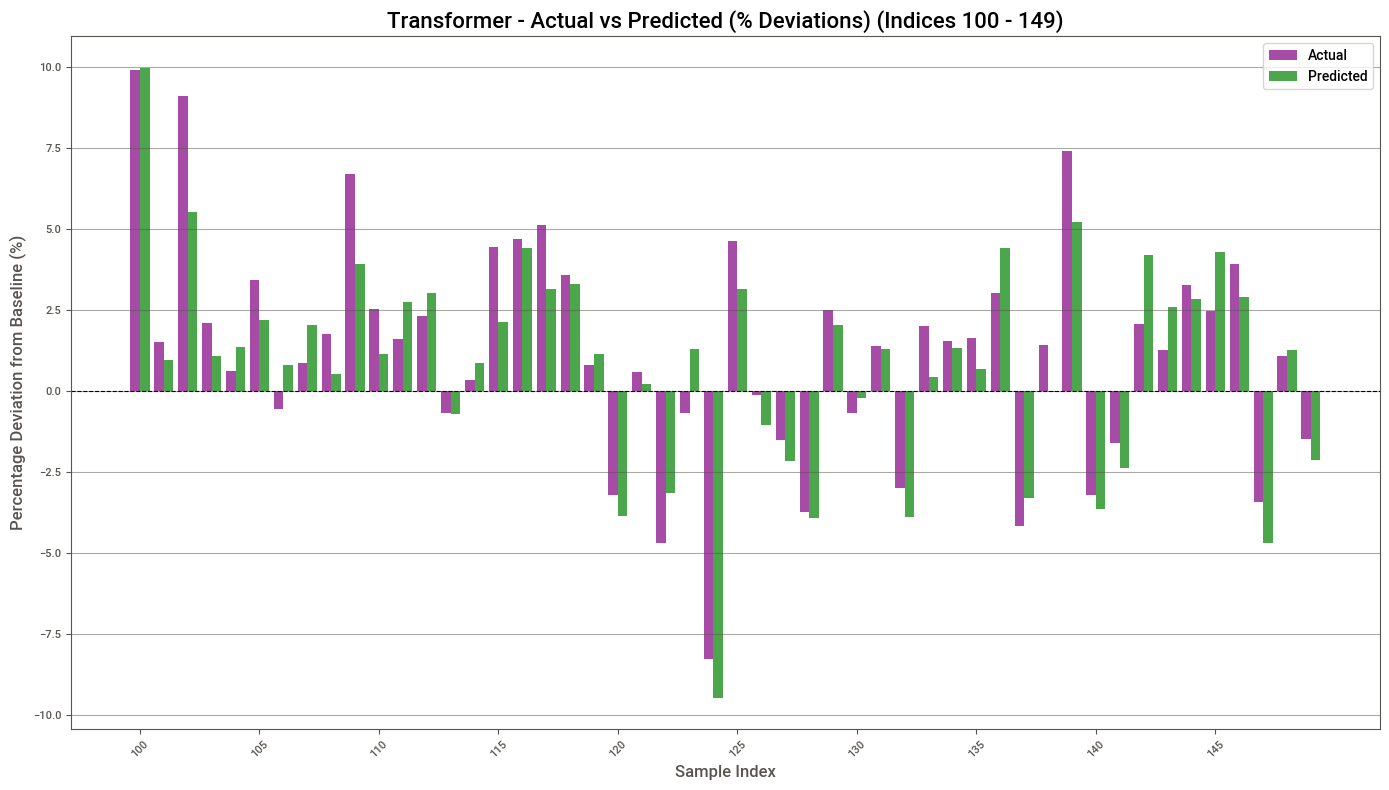

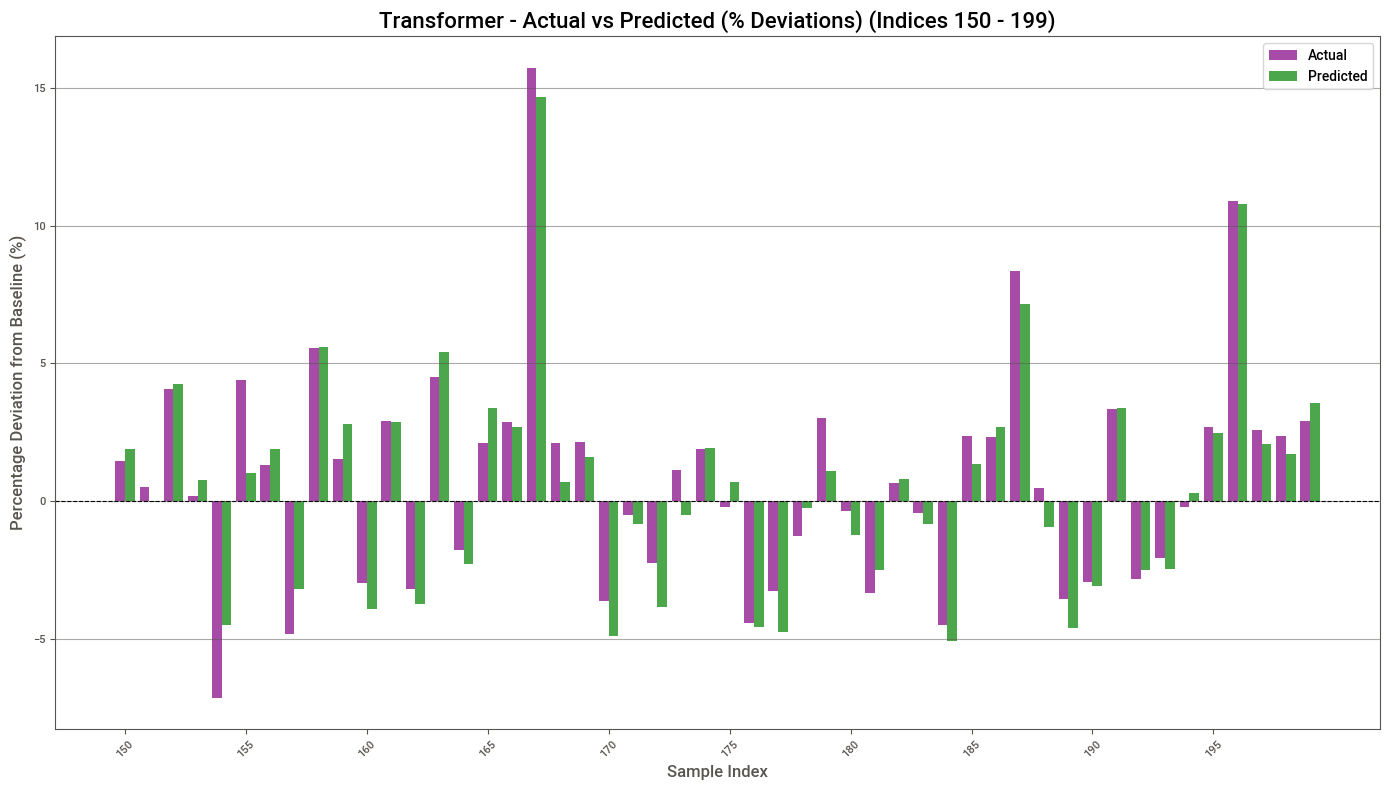

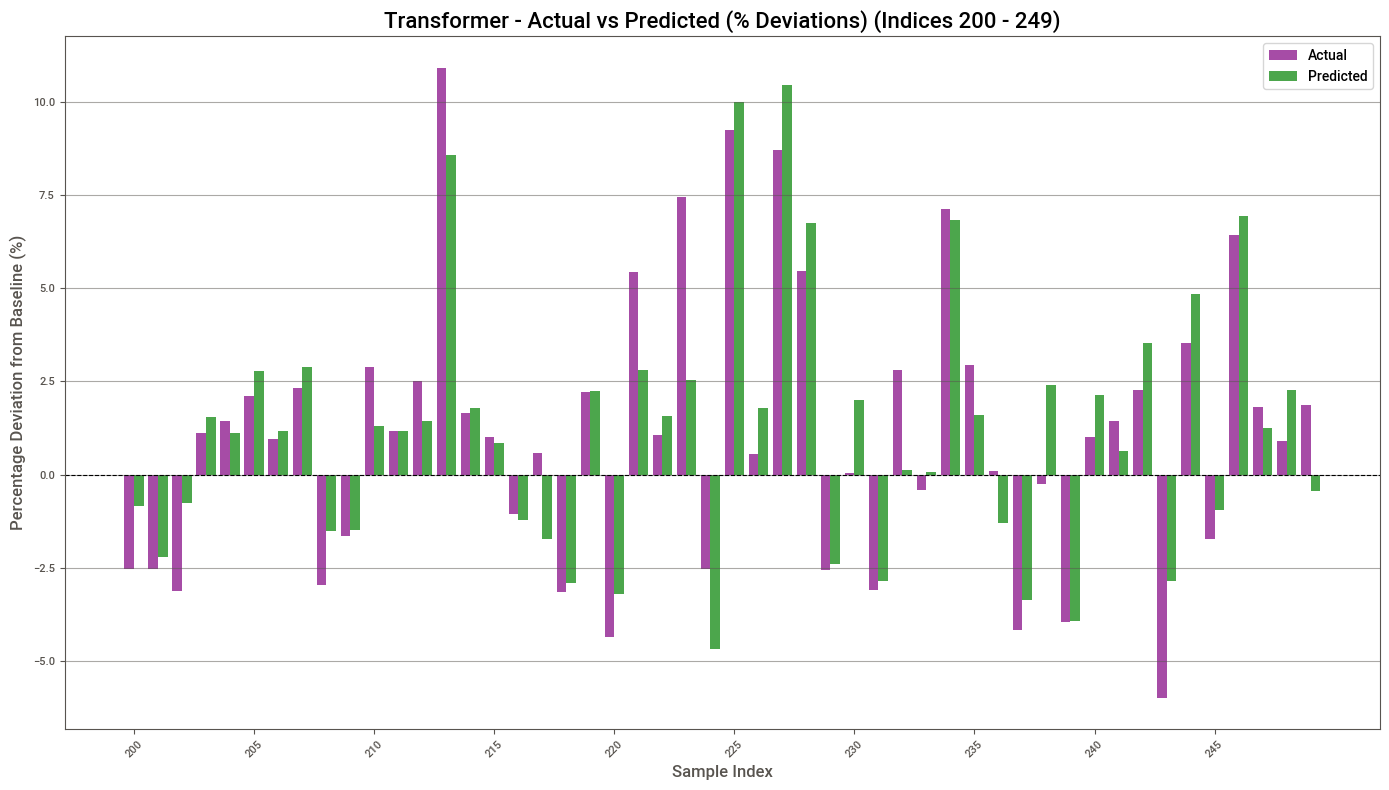

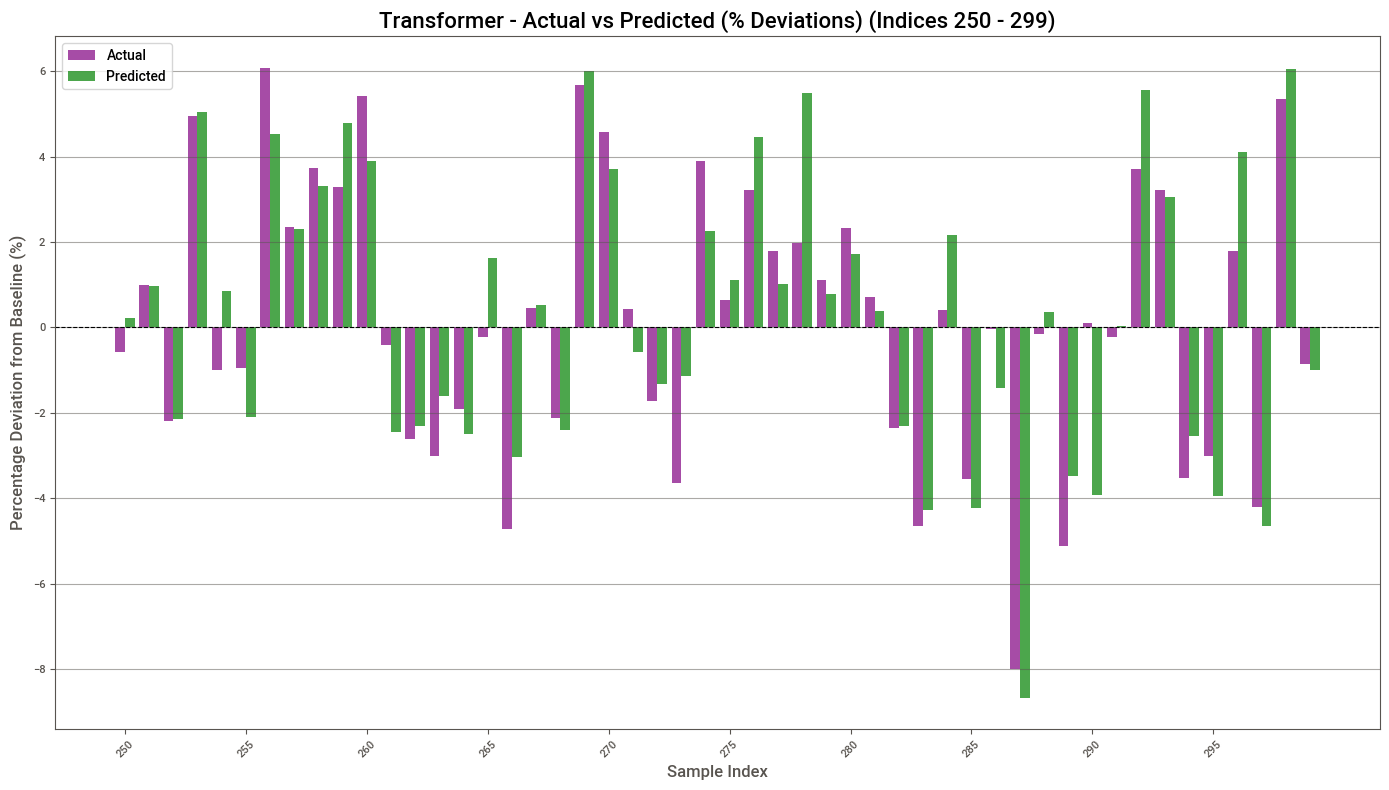

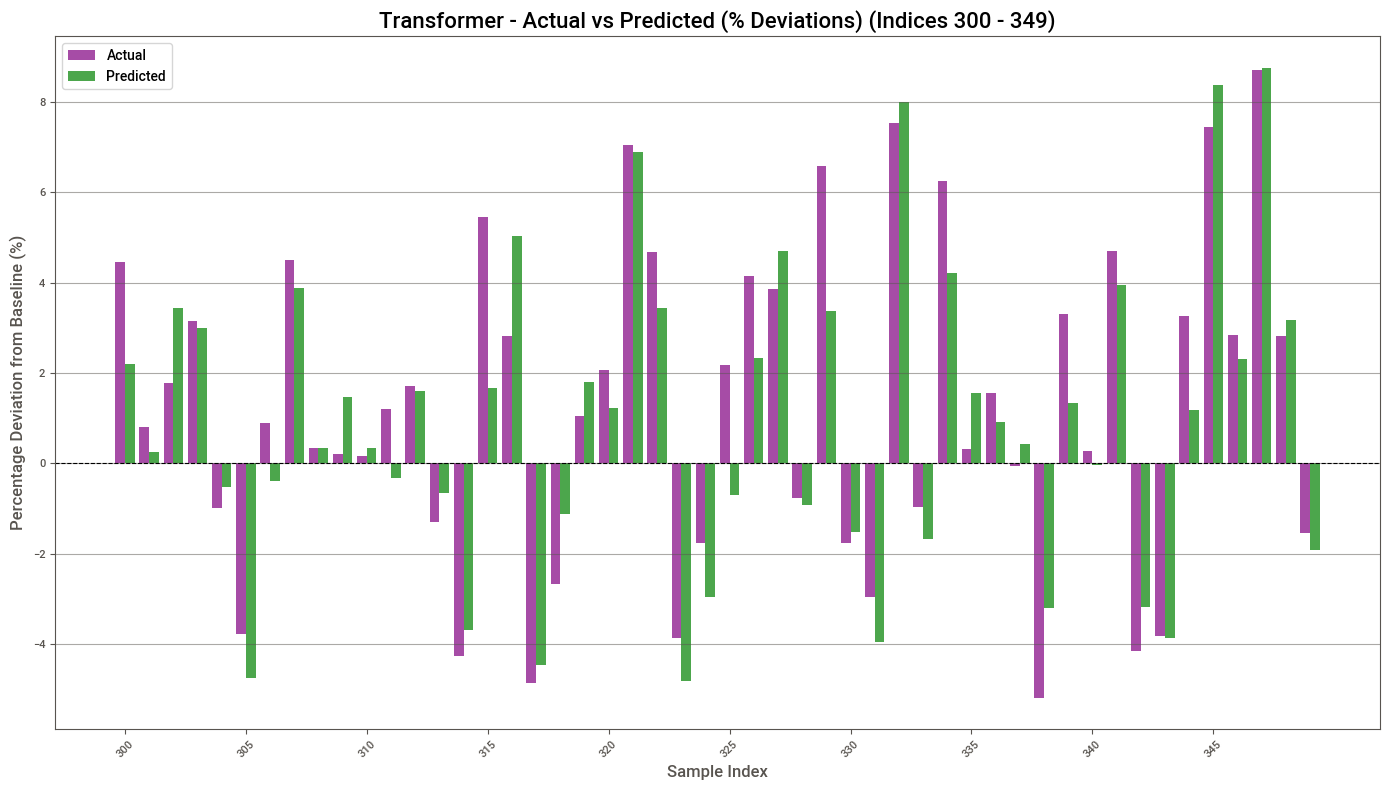

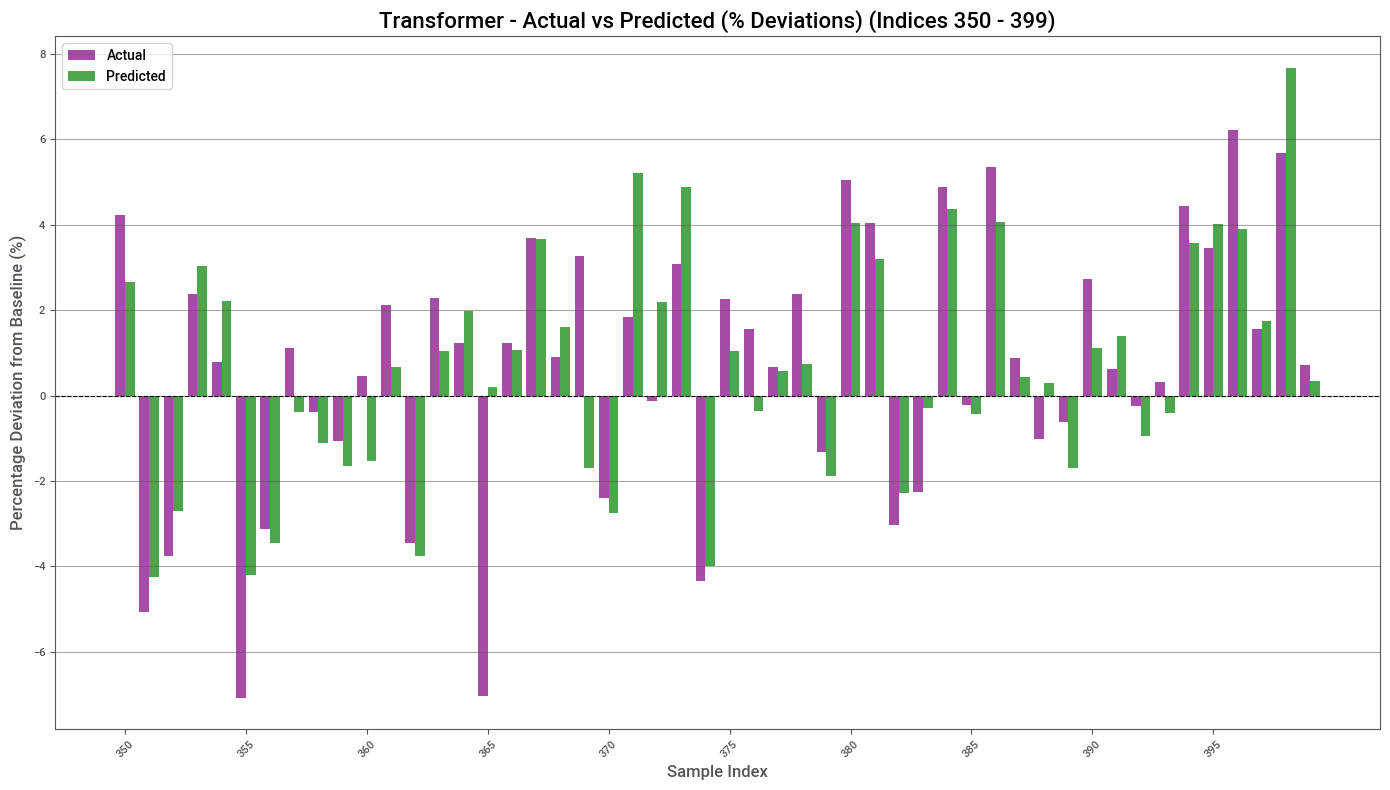

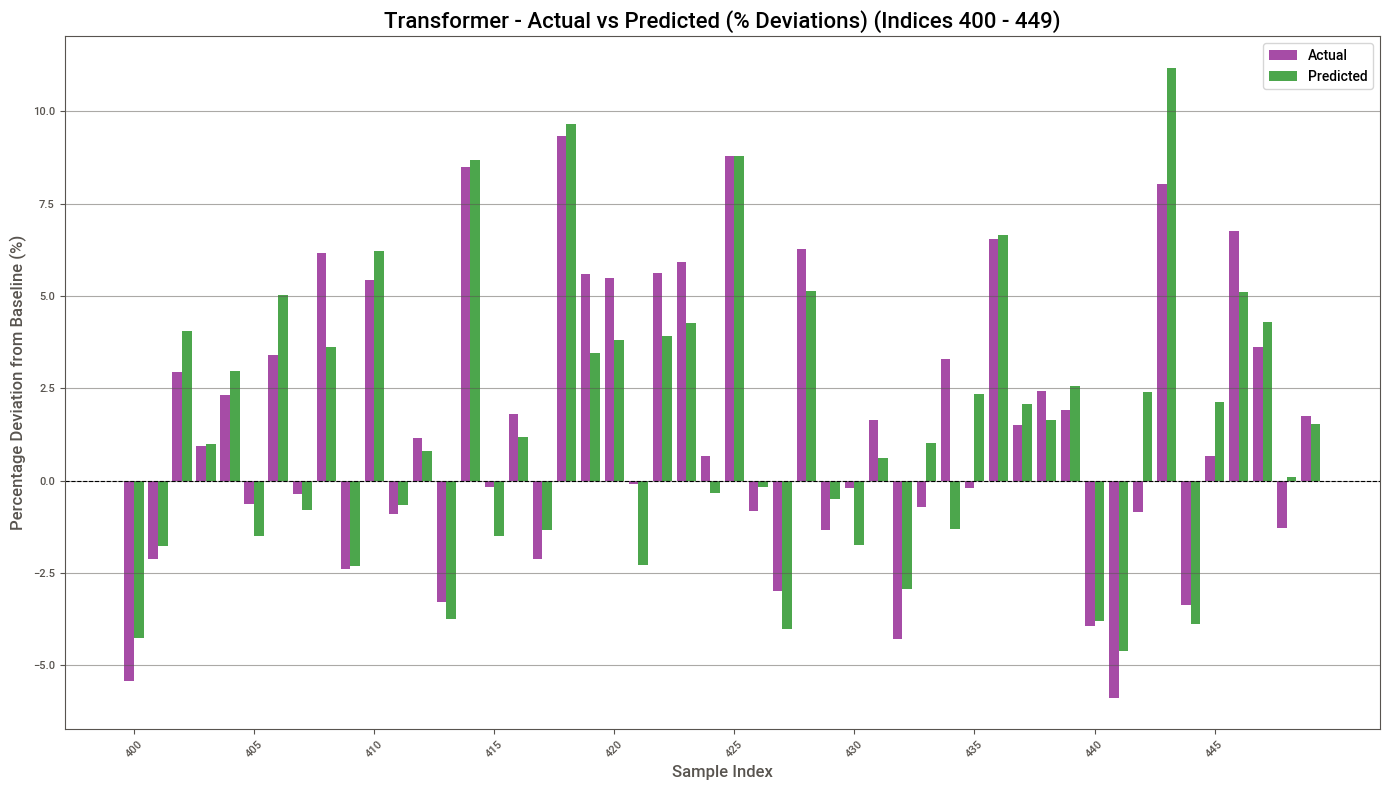

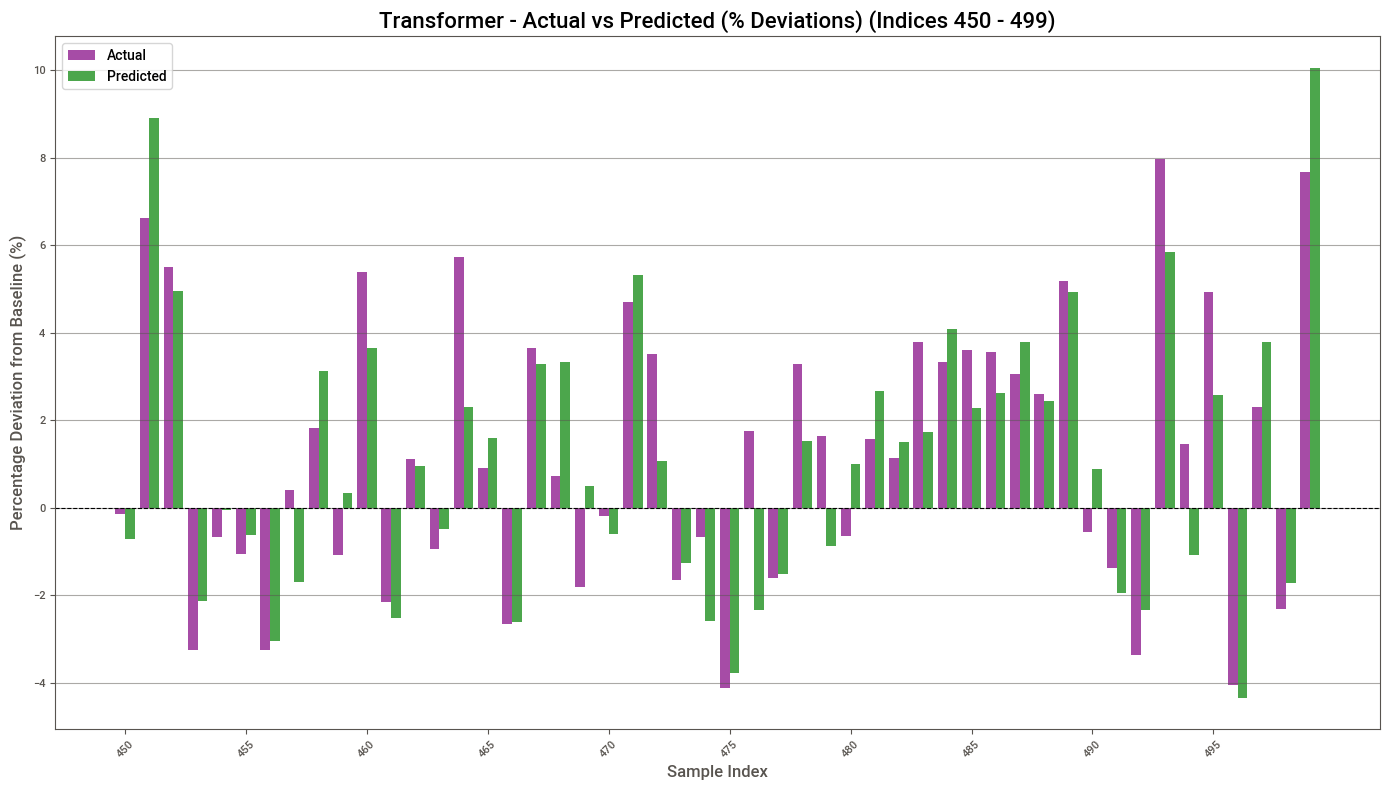

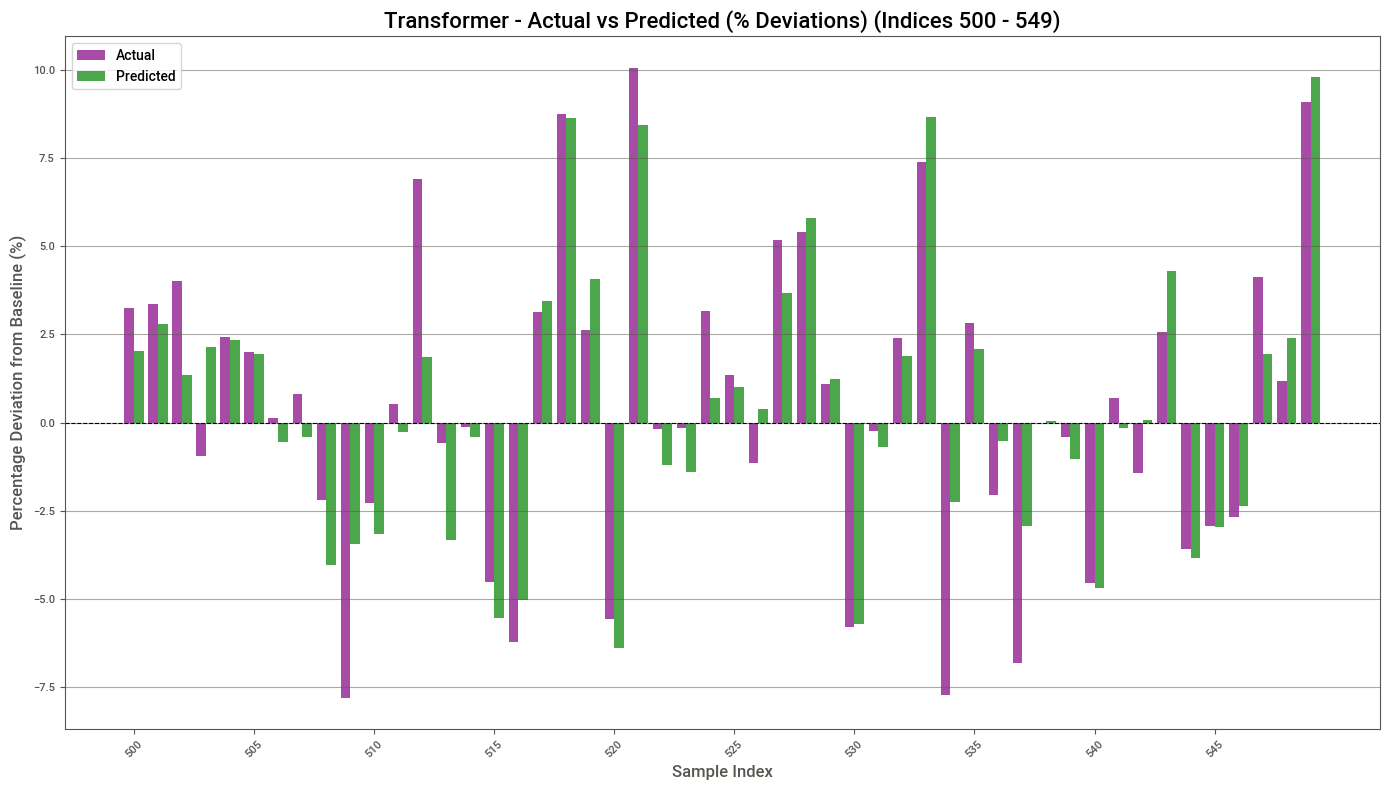

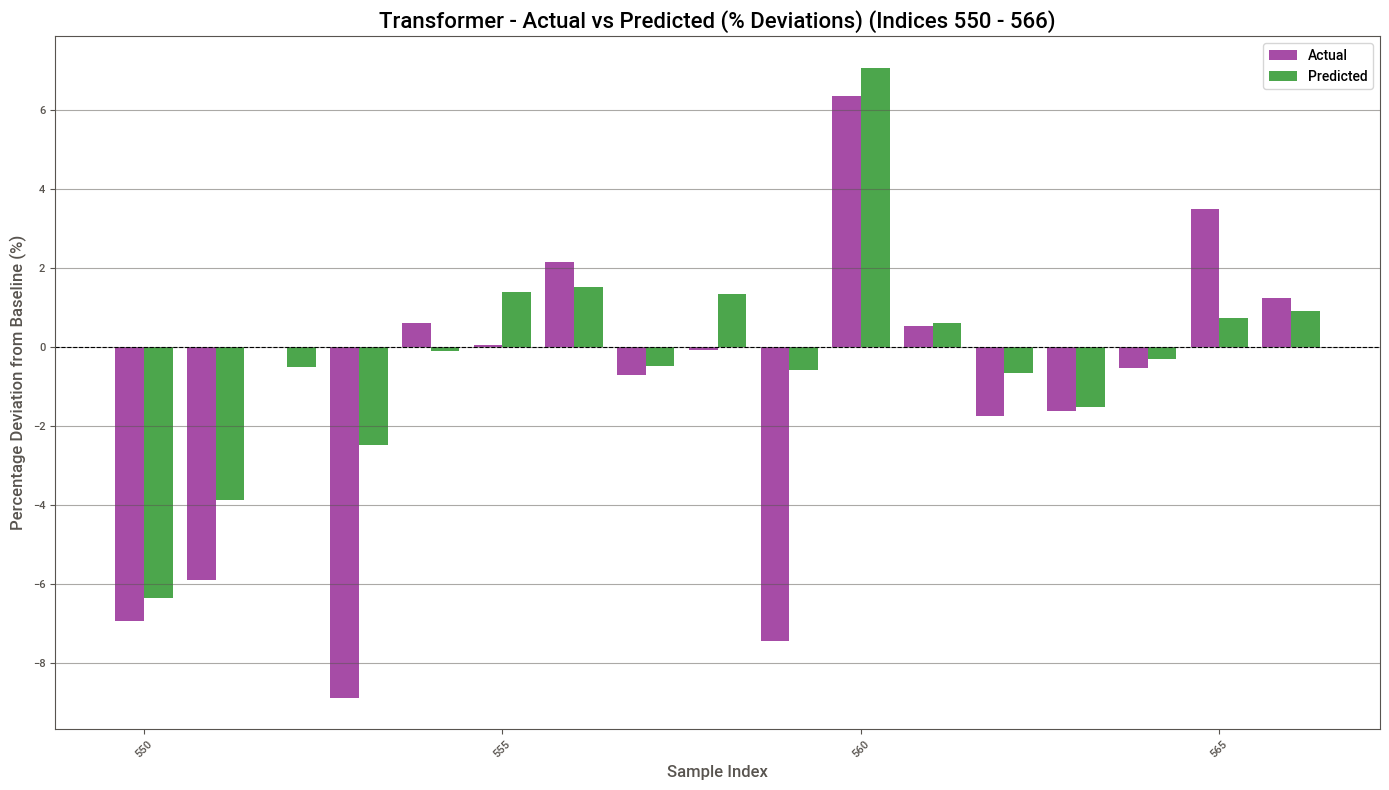

In [201]:
# Parameters
chunk_size = 50  # Maximum number of indices per chart
num_chunks = len(comparison_df) // chunk_size + (1 if len(comparison_df) % chunk_size != 0 else 0)

# Data preparation
actual = trans_comparison_df['Actual']  # Replace this with percentage-based actual values
predicted = trans_comparison_df['Predicted']  # Replace this with percentage-based predicted values
indices = np.arange(len(comparison_df))  # X-axis positions for each point

# Convert deviations to percentages
actual_percent = actual
predicted_percent = predicted 

# Create plots for each chunk
for i in range(num_chunks):
    # Calculate start and end indices for the chunk
    start_idx = i * chunk_size
    end_idx = min(start_idx + chunk_size, len(comparison_df))
    
    # Extract data for the current chunk
    actual_chunk = actual_percent[start_idx:end_idx]
    predicted_chunk = predicted_percent[start_idx:end_idx]
    indices_chunk = indices[start_idx:end_idx]
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    plt.bar(indices_chunk - 0.2, actual_chunk, width=0.4, label='Actual', color='Purple', alpha=0.7)
    plt.bar(indices_chunk + 0.2, predicted_chunk, width=0.4, label='Predicted', color='Green', alpha=0.7)
    
    # Add a baseline at y=0
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    
    # Add labels, legend, and title
    plt.title(f'Transformer - Actual vs Predicted (% Deviations) (Indices {start_idx} - {end_idx-1})', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Percentage Deviation from Baseline (%)', fontsize=12)
    plt.xticks(indices_chunk[::5], rotation=45)  # Show every 5th index for clarity
    plt.legend()
    plt.grid(axis='y', alpha=0.5)
    
    # Show the plot
    plt.tight_layout()
    plt.show()